In [ ]:
# this book will start from query sequence
# generate folding with > plddt 70 (or any) in a folder for all the 
# clustered a3m > 2 Kb (or any).
# use myenv . does not need to run colabfold in colabfold env since all modules are installed in base. 

In [2]:
#1 set consistent parent direction.
import os
import shutil

default_path = "/home/yuhong/Tu_paper2025"
#########################################################################################################2
COLAB = "/home/yuhong/colabfold/localcolabfold/colabfold-conda/bin/colabfold_batch"
SEQ = os.path.join(default_path,"SEQ")

#########################################################################################################3
# Set the right .a3m to cluster — should have just one in the folder
a3m_files = [f for f in os.listdir(SEQ) if f.endswith('.a3m')]
if a3m_files:
    a3m_for_cluster = os.path.join(SEQ, a3m_files[0])  # Select the first .a3m file
    print(f"Selected A3M file for clustering: {a3m_for_cluster}")
else:
    print("No .a3m files found in SEQ/")
# The clustered a3m moved to {default_path}/Cluster, which will be input for the folding and pdb sorting. 
input_path = os.path.join(default_path,"Cluster")
os.makedirs(input_path, exist_ok=True)
#########################################################################################################
########################################################################################################4
# define input and output file path 
a3m_path = os.path.join(input_path,"folding")
os.makedirs(a3m_path, exist_ok=True)

# Set the size threshold (4 KB)
size_threshold = 4 * 1024  # 4 KB
##########################################################################################################
#########################################################################################################5
# Define the log file path, CSV path, PDB directories, and threshold
log_file_path = os.path.join (a3m_path,"log.txt")  # Replace with the actual path
csv_output_path = os.path.join(a3m_path,"pLDDT.csv")  # Path for the output CSV file
pLDDT_threshold = 70.0  # Set your threshold for pLDDT
pdb_source_dir = a3m_path  # Directory containing the PDB files
pdb_target_dir = os.path.join(a3m_path,"sel_pdb")  # Directory to move selected PDB files
os.makedirs(pdb_target_dir, exist_ok=True)
##########################################################################################################
########################################################################################################6a
parent_folder = pdb_target_dir 
##########################################################################################################
#########################################################################################################6
default_path = "/home/yuhong/Tu_paper2025/Combined_sel_pdb" # this is the new parent path after combine all high confident pdbs. Disable this if continue from cell 5. 
# the original 3am and pdbs are in each subfoldders for downstream analysis. 
# need to combined pLDDT_truncated.csv for all subfolders.  
residue_range1 = "212-394" # for Tu, use domain II and III
NameOfFolder = f"1st_{residue_range1}_RMSD"
first_PSE_folder = os.path.join(default_path,NameOfFolder)
first_PSE = os.path.join(first_PSE_folder, f"{NameOfFolder}.pse")
first_CSV = os.path.join(first_PSE_folder, f"{NameOfFolder}.csv") # RMSD matrix
aligned_pdb_path = os.path.join(default_path,f"1st_{residue_range1}_aligned_pdb")
print(first_PSE_folder)
print(first_PSE)
print(first_CSV)
print(aligned_pdb_path)
#########################################################################################################
########################################################################################################7
pse_file = first_PSE
residue_range2 = "183-199"
NameOfFolder2 = f"2nd_{residue_range2}_RMSD"
second_PSE_folder = os.path.join(first_PSE_folder,NameOfFolder2)
second_PSE = os.path.join(second_PSE_folder, f"{NameOfFolder2}.pse")
second_CSV = os.path.join(second_PSE_folder, f"{NameOfFolder2}.csv") # RMSD matrix
print(second_CSV)
#########################################################################################################
#########################################################################################################
########################################################################################################8
# Define the path to the saved RMSD matrix
#input: second_CSV
#output
clustered_csv = second_CSV.replace(".csv","_cluster.csv")
print(clustered_csv)
#########################################################################################################
########################################################################################################9
#clustered_csv = hierarchical_clustering(first_CSV)[0] # output the clustering organized csv. 
input_csv = clustered_csv
off_diagnal_thr = 10
cluster_list = clustered_csv.replace(".csv",f"_list{off_diagnal_thr}.txt")
print(cluster_list)
#########################################################################################################
#######################################################################################################10
# Paths
tree_folder = os.path.join(second_PSE_folder,"tree")  # tree folder from handpicked largest a3m from each conformation from each protein type 
a3m_path = os.path.join(second_PSE_folder,"a3mFile") # copy all the a3m to this new folder. 
# cluster_list
combine_all = os.path.join(tree_folder,"combine_all.fasta")
########################################################################################################
######################################################################################################11
#All_combine
combine_all_summary = os.path.splitext(combine_all)[0] + "_summary.csv"
########################################################################################################
######################################################################################################12
#All_combine_summary
combine_all_summary_ID = os.path.splitext(combine_all_summary)[0] + "_ID.csv"
#######################################################################################################
#####################################################################################################13
# input is combine_all (combine_all.fasta)
combine_all_summary_ID_fas = os.path.splitext(combine_all_summary_ID)[0] + ".fas"
#######################################################################################################
######################################################################################################14
# Define the input file
fasta_forID_folder = tree_folder
fasta_forID_file = combine_all_summary_ID_fas
TAX_fa = os.path.splitext(fasta_forID_file)[0] + "_TAX.fa" 
print(TAX_fa)
########################################################################################################
######################################################################################################15
summary_TAX_fa = os.path.splitext(TAX_fa)[0] + "_summary.csv"
########################################################################################################
######################################################################################################16
summary_TAX_fa_uniqueList = os.path.splitext(summary_TAX_fa)[0]+"_list.csv"
print(summary_TAX_fa_uniqueList)
#######################################################################################################
####################################################################################################16b
summary_TAX_fa_uniqueList2 =os.path.splitext(summary_TAX_fa_uniqueList)[0]+"2.csv" # need to manualy set this short names.
TAX_fa_short = os.path.splitext(TAX_fa)[0] + "_shortened.fas"
print(summary_TAX_fa_uniqueList2)
print(TAX_fa_short)
#######################################################################################################
#################################################################################################### 17
# input is TAX_fa_short
min_length = 390
max_length = 400
#output
TAX_fa_short_filtered = os.path.splitext(TAX_fa_short)[0] + "_filtered.fas"
TAX_fa_short_error = os.path.splitext(TAX_fa_short)[0] + "_errors.txt"
tree_file = os.path.splitext(TAX_fa_short_filtered)[0]+".treefile"
anc_tree_file = os.path.splitext(TAX_fa_short_filtered)[0]+"_anc.treefile"
state_file = os.path.splitext(anc_tree_file)[0]+".statefile"
#######################################################################################################
####################################################################################################17b
# directory is 
directory_for_tree = tree_folder
# input find file_name.endswith("_filtered.treefile") should be tree_file
#output
anc_tree_file = os.path.splitext(TAX_fa_short_filtered)[0]+"_anc.treefile"
state_file = os.path.splitext(anc_tree_file)[0]+".statefile"
#######################################################################################################
#####################################################################################################18
# Path to the directory containing .treefile files
directory_path = tree_folder   # where the treefile locates
summary_TAX_fa_uniqueList3 = os.path.splitext(summary_TAX_fa_uniqueList)[0]+"3.csv"
#######################################################################################################
#####################################################################################################19
# Path to the directory containing .treefile files
directory_path = tree_folder   # where the treefile locates
summary_TAX_fa_uniqueList3 = os.path.splitext(summary_TAX_fa_uniqueList)[0]+"3.csv"
num_pro_perRing = 14
datasetA = os.path.splitext(tree_file)[0] + "_itol_datasetA.txt"
datasetB = os.path.splitext(tree_file)[0] + "_itol_datasetB.txt"
datasetC = os.path.splitext(tree_file)[0] + "_itol_datasetC.txt"
datasetD = os.path.splitext(tree_file)[0] + "_itol_datasetD.txt"
#######################################################################################################
#####################################################################################################20
# Set the directory path where your .treefile files are located
# tree_file
dataset_color = os.path.splitext(tree_file)[0] + "_branch_colors.txt"
#######################################################################################################
#####################################################################################################21
# input is datasetA and datasetB
keywords=['D81A', 'D81K', 'D81F', 'WT']
datasetA_D81A = os.path.splitext(datasetA)[0] + "_D81A.txt"
datasetA_D81F = os.path.splitext(datasetA)[0] + "_D81F.txt"
datasetA_D81K = os.path.splitext(datasetA)[0] + "_D81K.txt"
datasetA_WT = os.path.splitext(datasetA)[0] + "_WT.txt"
datasetB_D81A = os.path.splitext(datasetB)[0] + "_D81A.txt"
datasetB_D81F = os.path.splitext(datasetB)[0] + "_D81F.txt"
datasetB_D81K = os.path.splitext(datasetB)[0] + "_D81K.txt"
datasetB_WT = os.path.splitext(datasetB)[0] + "_WT.txt"

print(datasetA_D81A)
#######################################################################################################
#####################################################################################################22
# input is TAX_fa_short_filtered, the final aligned seq file before tree construction
TAX_fa_d81k_in_ef_tu_ex_wt = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_ef-tu_ex_wt.fasta"
TAX_fa_d81k_in_tum_ex_wt = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_tum_ex_wt.fasta"
TAX_fa_d81k_in_tuc_ex_wt = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_tuc_ex_wt.fasta"
TAX_fa_d81f_in_tuc_ex_d81k = os.path.splitext(TAX_fa_short_filtered)[0] + "d81f_in_tuc_ex_d81k.fasta"
TAX_fa_wt_in_ef_tu_in_d81k = os.path.splitext(TAX_fa_short_filtered)[0] + "wt_in_ef-tu_in_d81k.fasta"
TAX_fa_wt_in_ef_tu_ex_d81k = os.path.splitext(TAX_fa_short_filtered)[0] + "wt_in_ef-tu_ex_d81k.fasta"
TAX_fa_d81k_in_ef_1 = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_ef-1_ex.fasta"
TAX_fa_con1 = os.path.join(os.path.dirname(TAX_fa_short_filtered),"-1_.fasta")
TAX_fa_con2 = os.path.join(os.path.dirname(TAX_fa_short_filtered),"-2_.fasta")
TAX_fa_con3 = os.path.join(os.path.dirname(TAX_fa_short_filtered),"-3_.fasta")
TAX_fa_con4 = os.path.join(os.path.dirname(TAX_fa_short_filtered),"-4_.fasta")
TAX_fa_con5 = os.path.join(os.path.dirname(TAX_fa_short_filtered),"-5.fasta")
TAX_fa_con6 = os.path.join(os.path.dirname(TAX_fa_short_filtered),"-6_.fasta")
print (TAX_fa_con6)
#######################################################################################################
#####################################################################################################23
print(f"input is: {summary_TAX_fa}")
summary_in_d81k_ex_wt = os.path.join(os.path.dirname(summary_TAX_fa),"in_d81k_ex_wt.csv") # inclusive/exclusive terms are connected by "in/ex" sets are connected by _
summary_in_none_ex_wt = os.path.join(os.path.dirname(summary_TAX_fa),"in_none_ex_wt.csv")
summary_in_wt_ex_mutants =  os.path.join(os.path.dirname(summary_TAX_fa),"in_wt_ex_d81a_ex_d81f_ex_d81k.csv")
summary_in_wt_ex_none =  os.path.join(os.path.dirname(summary_TAX_fa),"in_wt_ex_none.csv")
#######################################################################################################
#####################################################################################################24
count_thr = 5
input_genus = summary_in_wt_ex_mutants
input_genus = summary_in_wt_ex_none
input_genus = summary_in_none_ex_wt
#######################################################################################################
#####################################################################################################25
print(f"input is: {summary_TAX_fa}")
species_path = os.path.join(os.path.dirname(summary_TAX_fa),"species")
basename_species = os.path.join(species_path, os.path.basename(summary_TAX_fa))
print (basename_species)
Actinomycetota_ID = os.path.splitext(basename_species)[0] + "_Actinomycetota_ID.csv"
firmicutes_ID = os.path.splitext(basename_species)[0] + "_firmicutes_ID.csv"
ADeltaproteobacteria_ID = os.path.splitext(basename_species)[0] + "_Deltaproteobacteria_ID.csv"
Chloroflexota_ID = os.path.splitext(basename_species)[0] + "_Chloroflexota_ID.csv"
Bacillota_ID = os.path.splitext(basename_species)[0] + "_Bacillota_ID.csv"
print(Bacillota_ID)
#######################################################################################################
#####################################################################################################26
csv_dir = species_path
# source file is TAX_fa
#######################################################################################################

No .a3m files found in SEQ/
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/1st_212-394_RMSD.pse
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/1st_212-394_RMSD.csv
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_aligned_pdb
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/2nd_183-199_RMSD.csv
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/2nd_183-199_RMSD_cluster.csv
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/2nd_183-199_RMSD_cluster_list10.txt
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX.fa
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary_list.csv
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary_list2.csv
/

In [2]:
#2 move query sequence into SEQ then run colabfold
# path of colabfold_batch is: /home/yuhong/colabfold/localcolabfold/colabfold-conda/bin/colabfold_batch
#set short reference to colabfold_batch
###########################################################################################
COLAB = "/home/yuhong/colabfold/localcolabfold/colabfold-conda/bin/colabfold_batch"
SEQ = os.path.join(default_path,"SEQ")
os.makedirs(SEQ, exist_ok=True)
###########################################################################################
!$COLAB --num-recycle 3 --num-models 5 --max-seq 1024 --max-extra-seq 10 SEQ SEQ

E0000 00:00:1745042983.185207    1007 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745042983.205230    1007 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-19 01:09:45,649 Running colabfold 1.5.5 (c21e1768d18e3608e6e6d99c97134317e7e41c75)
2025-04-19 01:09:45,649 non-fasta/a3m file in input directory: SEQ/log.txt
2025-04-19 01:09:46,244 Running on GPU
W0000 00:00:1745042986.375885    1007 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-04-19 01:09:46,639 Found 5 citations for tools or databases
2025-04-19

In [ ]:
#3 cluster .a3m in SEQ/. Then move them into Cluster
# need ClusterMSA_min3.py and utils.py ; both in default_path
import os
import glob
#########################################################################################################3
# Set the right .a3m to cluster — should have just one in the folder
a3m_files = [f for f in os.listdir(SEQ) if f.endswith('.a3m')]
if a3m_files:
    a3m_for_cluster = os.path.join(SEQ, a3m_files[0])  # Select the first .a3m file
    print(f"Selected A3M file for clustering: {a3m_for_cluster}")
else:
    print("No .a3m files found in SEQ/")
# The clustered a3m moved to {default_path}/Cluster, which will be input for the folding and pdb sorting. 
input_path = os.path.join(default_path,"Cluster")
os.makedirs(input_path, exist_ok=True)
#########################################################################################################
!python $default_path/ClusterMSA_min3.py EX -i {a3m_for_cluster} -o {input_path}  --log_dir {input_path}

In [ ]:
#4. source input_path = os.path.join(default_path,"Cluster")
# new path in this cell: a3m_path = os.path.join(input_path,"folding")
#move cluster equal or more than 4KB (or any threshold) to a3m_path, and fold all to pdb

import os
import shutil
##########################################################################4
# define input and output file path 
a3m_path = os.path.join(input_path,"folding")
os.makedirs(a3m_path, exist_ok=True)

# Set the size threshold (4 KB)
size_threshold = 4 * 1024  # 4 KB
#########################################################################
# Iterate through each file in the folder
for filename in os.listdir(input_path):
    # Check if the file is a .a3m file
    if filename.endswith(".a3m"):
        file_path = os.path.join(input_path, filename)
        # Get the size of the file in bytes
        file_size = os.path.getsize(file_path)
        # If the file size is less than the threshold, remove the file
        if file_size >= size_threshold:
            print(f"moving {filename} (Size: {file_size} bytes)")
            shutil.move(file_path, os.path.join(a3m_path, filename))

print("move complete!")

# folding all these a3m files. 
!$COLAB {a3m_path} {a3m_path} --num-models 1 --max-seq 1024

In [ ]:
#5. make selected pdb with pLDDT > threshold. 
# source: a3m_path
# outputpdb_target_dir = os.path.join(a3m_path,"sel_pdb")
#csv_output_path = os.path.jpoin(a3m_path,"pLDDT.csv")
# searching for best pLDDT > threshold, then move those into sel_pdb folder. 

import os
import shutil
import csv
import re
import pandas as pd
##########################################################################################################5
# Define the log file path, CSV path, PDB directories, and threshold
log_file_path = os.path.join (a3m_path,"log.txt")  # Replace with the actual path
csv_output_path = os.path.join(a3m_path,"pLDDT.csv")  # Path for the output CSV file
pLDDT_threshold = 70.0  # Set your threshold for pLDDT
pdb_source_dir = a3m_path  # Directory containing the PDB files
pdb_target_dir = os.path.join(a3m_path,"sel_pdb")  # Directory to move selected PDB files
os.makedirs(pdb_target_dir, exist_ok=True)
#############################################################################################################
import os
import shutil
import pandas as pd
import re
import csv

def process_and_move_pdb_files(source_dir, target_dir, threshold_val):
    """
    Processes a log file to extract pLDDT values, creates a CSV file,
    sorts values from high to low, removes values below a threshold, saves the sorted and truncated file
    with '_truncated' appended to the original name, and moves and renames PDB files accordingly.

    :param source_dir: Directory containing the log file and source PDB files.
    :param target_dir: Directory to store the truncated data and moved files.
    :param threshold_val: The pLDDT threshold for truncation.
    """
    
    # Define file paths
    log_file_path = os.path.join(source_dir, "log.txt")  # Assuming the log file name
    csv_output_path = os.path.join(target_dir, "pLDDT.csv")
    
    # Extract pLDDT data from log file and write to CSV
    with open(log_file_path, 'r') as log_file:
        lines = log_file.readlines()
    
    extracted_data = []
    
    for i, line in enumerate(lines):
        if "rank_001" in line:
            pLDDT_match = re.search(r'pLDDT=([\d.]+)', line)
            if pLDDT_match:
                pLDDT_value = float(pLDDT_match.group(1))
                
                for j in range(i, -1, -1):
                    if "Query" in lines[j]:
                        ex_match = re.search(r'(EX_\w{3})', lines[j])
                        if ex_match:
                            ex_code = ex_match.group(0)
                            extracted_data.append([ex_code, pLDDT_value])
                            break
    
    with open(csv_output_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['EX_Code', 'pLDDT_Value'])
        writer.writerows(extracted_data)
    
    print(f"Extracted data saved to {csv_output_path}")
    
    # Read the CSV file
    df = pd.read_csv(csv_output_path)
    
    # Sort the DataFrame based on the second column in descending order
    second_column_name = df.columns[1]
    sorted_df = df.sort_values(by=second_column_name, ascending=False)
    
    # Apply threshold filter
    truncated_df = sorted_df[sorted_df[second_column_name] >= threshold_val]
    
    # Generate the output truncated CSV file name
    truncated_csv_path = os.path.join(target_dir, "pLDDT_truncated.csv")
    
    # Save the sorted and truncated DataFrame
    truncated_df.to_csv(truncated_csv_path, index=False)
    
    print(f"CSV file sorted by '{second_column_name}', filtered by threshold, and saved as: {truncated_csv_path}")
    
    # Move and rename PDB files based on the truncated CSV file
    for _, row in truncated_df.iterrows():
        ex_code = row.iloc[0]  # First column contains PDB IDs
        
        # Ensure source_dir is a valid directory
        if not os.path.isdir(source_dir):
            raise ValueError(f"Invalid source directory: {source_dir}")
        
        # Search for files that start with EX_xxx_unrelaxed_rank_001
        for file_name in os.listdir(source_dir):
            if file_name.startswith(f'{ex_code}_unrelaxed_rank_001'):
                pdb_source_path = os.path.join(source_dir, file_name)
                new_file_name = f'{ex_code}.pdb'  # Truncated name
                pdb_target_path = os.path.join(target_dir, new_file_name)

                # Move the file to the target directory and rename it
                shutil.move(pdb_source_path, pdb_target_path)
                print(f'Moved and renamed: {file_name} -> {new_file_name}')
                break
        else:
            print(f'File not found for EX code: {ex_code}')


# Move and rename the PDB files
process_and_move_pdb_files(pdb_source_dir, pdb_target_dir, pLDDT_threshold)

print("PDB file processing complete.")


In [ ]:
#6a. to combine all 4 protein for analysis, first tag the a3m with protein source, also prefix protein name to every sequence ID. 
#1 first, pool all the high confident pdb and a3m in organized
# folder and rename them with source.
import os
########################################################################################################6a
parent_folder = pdb_target_dir 
##########################################################################################################
def append_folder_name_to_files_and_ids(folder_path):
    """
    Append the folder name to all .a3m and .txt files in the folder, update IDs in .a3m files,
    and replace 'EX' in .pdb file names with the folder name.

    Args:
        folder_path (str): Path to the folder containing the .a3m, .txt, and .pdb files.
    """
    # Get the folder name to append
    folder_name = os.path.basename(folder_path)

    # Process files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if file_name.endswith(".a3m"):
            # Rename the .a3m file
            new_file_name = f"{folder_name}_{file_name[3:]}"
            new_file_path = os.path.join(folder_path, new_file_name)
            os.rename(file_path, new_file_path)

            # Update the content of the .a3m file
            updated_content = []
            with open(new_file_path, 'r') as f:
                lines = f.readlines()
                for i in range(0, len(lines), 2):
                    header = lines[i].strip()
                    sequence = lines[i + 1].strip()

                    # Append folder name to the header
                    new_header = f">{folder_name}_{header[1:]}"
                    updated_content.append(new_header)
                    updated_content.append(sequence)

            # Write updated content back to the file
            with open(new_file_path, 'w') as f:
                f.writelines(f"{line}\n" for line in updated_content)

            print(f"Updated .a3m file: {new_file_name}")

        elif file_name.endswith(".txt"):
            # Rename the .txt file
            new_file_name = f"{folder_name}_{file_name}"
            new_file_path = os.path.join(folder_path, new_file_name)
            os.rename(file_path, new_file_path)
            print(f"Renamed .txt file: {new_file_name}")

        elif file_name.endswith(".pdb") and file_name.startswith("EX_"):
            # Replace 'EX' in the .pdb file name with the folder name
            new_file_name = file_name.replace("EX", folder_name, 1)
            new_file_path = os.path.join(folder_path, new_file_name)
            os.rename(file_path, new_file_path)
            print(f"Renamed .pdb file: {new_file_name}")

def process_all_subfolders_or_parent(parent_folder):
    """
    Process all subfolders in a given parent folder to append folder names to files and IDs.
    If no subfolders are found, process files in the parent folder itself.

    Args:
        parent_folder (str): Path to the parent folder containing subfolders to process.
    """
    subfolders = [os.path.join(parent_folder, subfolder_name) for subfolder_name in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, subfolder_name))]

    if subfolders:
        # Process each subfolder
        for subfolder_path in subfolders:
            print(f"Processing folder: {subfolder_path}")
            append_folder_name_to_files_and_ids(subfolder_path)
    else:
        # No subfolders found, process the parent folder itself
        print(f"No subfolders found. Processing parent folder: {parent_folder}")
        append_folder_name_to_files_and_ids(parent_folder)

process_all_subfolders_or_parent(parent_folder)


In [ ]:
#6. load all pdbs in the default_path (or in subfolders if contain pdbs) to pymol2, align with ref in a range.This is more efficient because 
# almost prefectly aligned. so the RMSD reflects more on the true divergences in other ranges. 
# save the new pdbs coordinates in the
#pse. and in a new subfolder: /aligned. then output the RMSD.
# if you continure from previous cell, remove the new default_path. 

import os
import pymol2
import numpy as np
import pandas as pd
import subprocess
#########################################################################################################6
default_path = "/home/yuhong/Tu_paper2025/Combined_sel_pdb" # this is the new parent path after combine all high confident pdbs. Disable this if continue from cell 5. 
# the original 3am and pdbs are in each subfoldders for downstream analysis. 
# need to combined pLDDT_truncated.csv for all subfolders.  
residue_range1 = "212-394" # for Tu, use domain II and III
#########################################################################################################

NameOfFolder = f"1st_{residue_range1}_RMSD" # make a subfolder and pse and RMSD all named the same in the folder. 

def find_reference_pdb(parent_folder):
    """Locate the reference PDB file by searching in the parent folder and its subfolders."""
    
    # Find the first CSV file in the parent folder that ends with '.csv'
    csv_files = [f for f in os.listdir(parent_folder) if f.endswith('.csv')]
    if not csv_files:
        print("Error: No CSV file found in the parent folder.")
        return None

    PDB_list_path = os.path.join(parent_folder, csv_files[0])
    
    try:
        REF_pdb_base = subprocess.run(
            f"tail -n +2 {PDB_list_path} | head -n 1 | cut -d, -f1",
            shell=True, text=True, capture_output=True, check=True
        ).stdout.strip()

        if not REF_pdb_base:
            print(f"Error: No valid reference PDB found in {csv_files[0]}.")
            return None

        REF_pdb_name = REF_pdb_base + ".pdb"
        REF_pdb_path = os.path.join(parent_folder, REF_pdb_name)

        if os.path.exists(REF_pdb_path):
            return REF_pdb_path

        pdb_prefix = REF_pdb_base.split("_")[0]
        for root, _, files in os.walk(parent_folder):
            if os.path.basename(root).startswith(pdb_prefix):
                for file in files:
                    if file == REF_pdb_name:
                        return os.path.join(root, file)

        print(f"Error: Reference PDB {REF_pdb_name} not found in parent folder or subfolders.")
        return None

    except subprocess.CalledProcessError:
        print(f"Error: Could not extract reference PDB from {csv_files[0]}.")
        return None


def load_and_align_pdbs(parent_folder, resi_range):
    """
    Load all PDB files from the parent folder (or subfolders), align them to a reference PDB,
    save the new coordinates in a subfolder /aligned, and calculate the RMSD matrix only for PDBs in the /aligned folder.
    """
    
    REF_pdb = find_reference_pdb(parent_folder)
    if REF_pdb is None:
        return None, None

    REF_pdb_base = os.path.basename(REF_pdb).replace(".pdb", "")

    with pymol2.PyMOL() as pymol:
        pymol.cmd.reinitialize()

        # Load reference PDB
        print(f"Loading reference PDB: {REF_pdb}")
        pymol.cmd.load(REF_pdb, "REF")
        pymol.cmd.select("REF_align", f"REF and resi {resi_range}")

        aligned_folder = os.path.join(default_path,f"1st_{residue_range1}_aligned_pdb")
        os.makedirs(aligned_folder, exist_ok=True)

        # Load all PDB files from parent folder and subfolders
        print("Searching for PDB files...")
        pdb_files = []
        for root, _, files in os.walk(parent_folder):
            for file_name in files:
                if file_name.endswith(".pdb"):
                    pdb_path = os.path.join(root, file_name)
                    obj_name = os.path.splitext(file_name)[0]
                    pymol.cmd.load(pdb_path, obj_name)
                    pdb_files.append(obj_name)
                    print(f"Loaded: {obj_name}")

        if not pdb_files:
            print("No PDB files found. Exiting...")
            return None, None

        # Align all PDBs to the reference
        print("Aligning PDB files...")
        for idx, obj_name in enumerate(pdb_files, start=1):
            pymol.cmd.cealign("REF_align",f"{obj_name} and resi {resi_range}")
            output_pdb_path = os.path.join(aligned_folder, f"{obj_name}.pdb")
            pymol.cmd.save(output_pdb_path, obj_name)
            print(f"Aligned {idx}/{len(pdb_files)}: {obj_name}, saved to {output_pdb_path}")

        # Save PyMOL session in a separate folder parallel to pdb path,same as the RMSD matrix.
        pse_folder = os.path.join(parent_folder,NameOfFolder)
        os.makedirs(pse_folder,exist_ok=True)
        pse_path = os.path.join(pse_folder, f"{NameOfFolder}.pse")
        pymol.cmd.save(pse_path)
        print(f"PyMOL session saved as: {pse_path}")

        return aligned_folder, pse_path


def calculate_rmsd(aligned_folder, resi_range):
    """
    Compute the RMSD matrix for PDBs **only in the /aligned subfolder** (full structure RMSD).
    """

    with pymol2.PyMOL() as pymol:
        pymol.cmd.reinitialize()

        # Load all PDBs from the aligned folder
        print("Loading aligned PDBs for RMSD calculation...")
        pdb_files = []
        for file_name in os.listdir(aligned_folder):
            if file_name.endswith(".pdb"):
                pdb_path = os.path.join(aligned_folder, file_name)
                obj_name = os.path.splitext(file_name)[0]
                pymol.cmd.load(pdb_path, obj_name)
                pdb_files.append(obj_name)
                print(f"Loaded: {obj_name}")

        if not pdb_files:
            print("No aligned PDBs found in /aligned folder. Exiting...")
            return None

        # Compute RMSD matrix for all aligned PDBs (full structure)
        print("Calculating RMSD matrix for aligned PDBs (full structure)...")
        n = len(pdb_files)
        rmsd_matrix = np.zeros((n, n))

        for i, obj1 in enumerate(pdb_files):
            for j, obj2 in enumerate(pdb_files):
                if i <= j:  
                    rmsd = pymol.cmd.rms_cur(f"{obj1}", f"{obj2}")  # Full structure RMSD
                    rmsd_matrix[i, j] = rmsd
                    rmsd_matrix[j, i] = rmsd  
                    print(f"RMSD: {obj1} vs {obj2} = {rmsd:.3f}")

        # Save RMSD matrix to CSV in a separate folder parallel to pdb path. 
        pdb_base = os.path.dirname(aligned_folder)
        csv_folder = os.path.join(pdb_base,NameOfFolder)
        os.makedirs(csv_folder,exist_ok=True)
        rmsd_output_path = os.path.join(csv_folder, f"{NameOfFolder}.csv")
        rmsd_df = pd.DataFrame(rmsd_matrix, index=pdb_files, columns=pdb_files)
        rmsd_df.to_csv(rmsd_output_path)
        print(f"RMSD matrix saved as: {rmsd_output_path}")

        return rmsd_output_path

# Run alignment
aligned_pdb, first_PSE = load_and_align_pdbs(default_path, residue_range1)

# Run RMSD calculation only on aligned PDBs
# mayddisable this one if second RMSD matrix is used see cell #7. 
if aligned_pdb:
    calculate_rmsd(aligned_pdb,residue_range1) # first_CSV = calculate_rmsd(aligned_pdb,residue_range1) if need to save the matrix
    


In [ ]:
# 7. Second sorting with a range — make a subfolder of .pse and RMSD.csv
# need to restart the notebook. and rerun cell 1 to set the path parameters. 
import os
from pymol import cmd
import numpy as np
import pandas as pd

###########################################################################################################7
pse_file = first_PSE  # Make sure this is defined
first_PSE_path = os.path.dirname(pse_file)  # Extract base folder
residue_range2 = "183-199"  # Fix the range definition
############################################################################################################

def extract_residues_and_save(pse_file, residue_range):
    """
    Open a .pse file, remove all residues outside a specified range, overwrite the PDB files,
    and save the modified PyMOL session in a new subfolder.
    """
    cmd.reinitialize()
    print(f"Loading .pse file: {pse_file}")
    cmd.load(pse_file)

    NameOfFolder2 = f"2nd_{residue_range}_RMSD"
    output_folder = os.path.join(first_PSE_path, NameOfFolder2)
    os.makedirs(output_folder, exist_ok=True)

    pdb_files = cmd.get_object_list()
    print(f"Found {len(pdb_files)} objects in the session.")

    for obj_name in pdb_files:
        cmd.select("to_remove", f"{obj_name} and not resi {residue_range}")
        cmd.remove("to_remove")
        print(f"Modified PDB: {obj_name}")

    output_pse_path = os.path.join(
        output_folder,
        f"{NameOfFolder2}.pse"
    )
    cmd.save(output_pse_path)
    print(f"Modified PyMOL session saved as: {output_pse_path}")
    return output_pse_path

def calculate_pairwise_rmsd(pse_file):
    """
    Calculate pairwise RMSD for all objects in a .pse file and save the results as a CSV file.
    """
    cmd.reinitialize()
    print(f"Loading .pse file for RMSD calculation: {pse_file}")
    cmd.load(pse_file)

    pdb_files = cmd.get_object_list()
    n = len(pdb_files)
    rmsd_matrix = np.zeros((n, n))

    print("Starting pairwise RMSD calculations...")
    total_comparisons = (n * (n + 1)) // 2
    completed = 0

    for i, obj1 in enumerate(pdb_files):
        for j, obj2 in enumerate(pdb_files):
            if i <= j:
                rmsd = cmd.rms_cur(obj1, obj2, quiet=1)
                rmsd_matrix[i, j] = rmsd
                rmsd_matrix[j, i] = rmsd
                completed += 1
                print(f"RMSD ({completed}/{total_comparisons}): {obj1} vs {obj2}, RMSD = {rmsd:.3f}")

    output_csv = pse_file.replace(".pse", ".csv")
    rmsd_df = pd.DataFrame(rmsd_matrix, index=pdb_files, columns=pdb_files)
    rmsd_df.to_csv(output_csv)
    print(f"RMSD matrix saved as: {output_csv}")

# Run steps
modified_pse_path = extract_residues_and_save(pse_file, residue_range2)
calculate_pairwise_rmsd(modified_pse_path)
cmd.quit()


In [ ]:
#8. plot and analysis RMSD for grouping. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list, to_tree
from scipy.spatial.distance import pdist
from Bio import Phylo
from io import StringIO
#########################################################################################################8
# Define the path to the saved RMSD matrix
#input: second_CSV
#output
clustered_csv = second_CSV.replace(".csv","_cluster.csv")
print(clustered_csv)
#########################################################################################################
def convert_to_newick(node, parent_dist, leaf_names, newick_str=""):
    """
    Recursively convert a SciPy hierarchical clustering tree to Newick format.
    """
    if node.is_leaf():
        return f"{leaf_names[node.id]}:{parent_dist - node.dist:.6f}"
    else:
        left_newick = convert_to_newick(node.left, node.dist, leaf_names)
        right_newick = convert_to_newick(node.right, node.dist, leaf_names)
        return f"({left_newick},{right_newick}):{parent_dist - node.dist:.6f}"

def hierarchical_clustering(Pearson_input, plot_csv=True):
    """
    Perform hierarchical clustering on a correlation summary CSV file.

    Parameters:
    - Pearson_input (str): Path to the CSV file containing correlation summary.
    - plot_csv (bool): Whether to generate a heatmap with dendrogram.

    Returns:
    - str: Path to the saved clustered CSV file.
    - str: Path to the saved dendrogram plot.
    - str: Path to the saved dendrogram Newick file.
    """
    # Load CSV
    df_summary = pd.read_csv(Pearson_input, index_col=0) # re-reading rmsd matrix. 

    # Compute hierarchical clustering directly from df_summary (without squareform)
    linkage_matrix = linkage(pdist(df_summary, metric='euclidean'), method='average')

    # Get the SciPy cluster order
    cluster_order = leaves_list(linkage_matrix)
    ordered_labels_scipy = df_summary.index[cluster_order].tolist()

    # Reorder the DataFrame based on clustering order
    clustered_df = df_summary.iloc[cluster_order, :].iloc[:, cluster_order]
    clustered_df.index = ordered_labels_scipy
    clustered_df.columns = ordered_labels_scipy

    # Save clustered CSV
    clustered_csv_filename = Pearson_input.replace(".csv", "_cluster.csv")
    clustered_df.to_csv(clustered_csv_filename)
    print(f"✅ Clustered correlation summary saved as {clustered_csv_filename}")

    # Get the output directory
    subfolder = os.path.dirname(Pearson_input)

    # Save dendrogram plot
    dendro_plot_filename = os.path.join(subfolder, "dendrogram.png")
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=ordered_labels_scipy, leaf_rotation=90, leaf_font_size=10)
    plt.title("Dendrogram of Correlation Summary Clustering")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.savefig(dendro_plot_filename)
    plt.close()
    print(f"✅ Dendrogram plot saved as {dendro_plot_filename}")

    # Save dendrogram in .nwk format
    tree, _ = to_tree(linkage_matrix, rd=True)  # Extract tree structure
    newick_str = convert_to_newick(tree, tree.dist, ordered_labels_scipy) + ";\n"
    newick_filename = os.path.join(subfolder, f"{os.path.basename(Pearson_input)}.nwk")
    with open(newick_filename, "w") as f:
        f.write(newick_str)
    print(f"✅ Dendrogram saved as {newick_filename}")

    # Plot heatmap with dendrogram if plot_csv is True
    if plot_csv:
        print("🔹 Running Seaborn clustermap (which performs its own clustering)...")
        g = sns.clustermap(df_summary, method='average', cmap='coolwarm', figsize=(12, 10))

        # Extract Seaborn cluster order
        reordered_rows_seaborn = [df_summary.index[i] for i in g.dendrogram_row.reordered_ind]
        reordered_cols_seaborn = [df_summary.columns[i] for i in g.dendrogram_col.reordered_ind]

        plt.title("Heatmap Dendrogram of Correlation Summary")
        plot_filename = os.path.join(subfolder, "heatmap.png")
        plt.savefig(plot_filename)
        plt.show()
        print(f"✅ Correlation summary heatmap saved as {plot_filename}")

    return clustered_csv_filename, dendro_plot_filename, newick_filename

# Run clustering function
clustered_csv = hierarchical_clustering(second_CSV)[0] # output the clustering organized csv. 

In [ ]:
#9. plot the dendrogram (clustered_csv from 7) with customer color palette. the original plot as shown. 
# and plot the off-diagnal transition curve of element(i-1, i). 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
########################################################################################################9
#clustered_csv = hierarchical_clustering(first_CSV)[0] # output the clustering organized csv. 
input_csv = clustered_csv
off_diagnal_thr = 10
cluster_list = clustered_csv.replace(".csv",f"_list{off_diagnal_thr}.txt")
print(cluster_list)
#########################################################################################################

def plot_clustered_heatmap(csv_file, color_map=None):
    """Plots a heatmap from a clustered CSV file with custom conditional coloring."""
    
    if color_map is None:
        color_map = [(0.0, "#FF0000"), (10, "#FFA500"), (15, "#FFFFFF")]

    df = pd.read_csv(csv_file, index_col=0)
    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)  # Ensure numeric data

    # Extract thresholds and colors
    thresholds, colors = zip(*sorted(set(color_map), key=lambda x: x[0]))

    # Ensure upper bound is valid
    upper_bound = max(df.max().max(), thresholds[-1] + 1)

    # Debugging - Print the exact bins used
    print("Thresholds:", thresholds)
    print("Upper Bound:", upper_bound)

    # Fix: BoundaryNorm must have len(thresholds) + 1 boundaries
    boundaries = list(thresholds) + [upper_bound]
    norm = mcolors.BoundaryNorm(boundaries=boundaries, 
                                ncolors=len(boundaries))  # Fixed: one more bin than colors

    # Fix: Ensure colormap has the correct number of entries
    if len(colors) != len(boundaries) - 1:
        raise ValueError(f"Number of colors ({len(colors)}) must match number of bins ({len(boundaries) - 1}).")

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df, annot=False, linewidths=0.5, cmap=mcolors.ListedColormap(colors), norm=norm, cbar=True)
    plt.title("Clustered Heatmap with Custom Coloring")

    # Save and show the figure
    custom_plot_filename = csv_file.replace(".csv", "_custom_heatmap.png")
    plt.savefig(custom_plot_filename)
    plt.show()
    print(f"✅ Custom heatmap saved as {custom_plot_filename}")

    return custom_plot_filename


def plot_standard_clustermap(csv_file):
    """Plots the saved clustered CSV using the default clustermap settings."""
    
    # Load the clustered CSV file
    df = pd.read_csv(csv_file, index_col=0)

    # Plot using seaborn clustermap
    plt.figure(figsize=(10, 8))
    g = sns.clustermap(df, method='average', cmap='coolwarm', figsize=(12, 10))
    plt.title("Heatmap Dendrogram of Pearson correation Matrix")
    
    # Save plot
    clustermap_filename = csv_file.replace(".csv", "_clustermap.png")
    plt.savefig(clustermap_filename)
    plt.show()
    print(f"✅ Clustermap saved as {clustermap_filename}")

    return clustermap_filename

def plot_off_diagonal_curve(csv_file, threshold=12):
    """Plot the off-diagonal elements above the diagonal elements as a single curve.
    Identify clusters where off-diagonal values drop below the threshold.
    
    Parameters:
    csv_file (str): Path to the clustered CSV file.
    threshold (float): Cutoff value to define clusters.
    """
    
    # Load the CSV file as a DataFrame
    df = pd.read_csv(csv_file, index_col=0)
    
    # Convert all data to numeric
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Ensure the matrix is square
    if df.shape[0] != df.shape[1]:
        raise ValueError("The input matrix must be square.")
    
    # Extract the first off-diagonal elements (above the main diagonal)
    off_diagonal_values = df.values[np.arange(df.shape[0] - 1), np.arange(1, df.shape[1])]
    # Print extracted values
    print("First Off-Diagonal Values:")
    #print(off_diagonal_values)
    
    # Plot the curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(off_diagonal_values) + 1), off_diagonal_values, marker='o', linestyle='-')
    plt.xlabel("Index")
    plt.ylabel("Off-Diagonal Value")
    plt.title("Off-Diagonal Elements Curve")
    plt.grid()
    plt.show()
    
    # Identify clusters based on threshold
    cluster_list = []
    current_cluster = [df.index[0]]

    for i in range(len(off_diagonal_values)):
        if off_diagonal_values[i] > threshold:
            if i > 0 and off_diagonal_values[i - 1] > threshold:
                cluster_list.append(current_cluster)
                current_cluster = [df.index[i+1]]
            else:
                cluster_list.append(current_cluster)
                current_cluster = [df.index[i+1]]
        else:
            current_cluster.append(df.index[i+1])
    
    # Append the final cluster
    if current_cluster:
        cluster_list.append(current_cluster)
    
    # Save clusters to a text file
    txt_filename = csv_file.replace(".csv", f"_list{threshold}.txt")
    with open(txt_filename, "w") as f:
        for idx, cluster in enumerate(cluster_list):
            f.write(f"Cluster {idx+1}: {', '.join(cluster)}\n")
    print(f"✅ Cluster list saved as {txt_filename}")
    return txt_filename

# Run the heatmap and verification plots
custom_heatmap = plot_clustered_heatmap(input_csv, color_map=None)
clustermap_plot = plot_standard_clustermap(input_csv)
cluster_list = plot_off_diagonal_curve(input_csv, off_diagnal_thr)


In [ ]:
#10. make a new folder with all selected a3m files. Then combines a3m by cluster_list.
 
import os
import glob
import re
from collections import defaultdict
from Bio import SeqIO

#######################################################################################################10
# Paths
tree_folder = os.path.join(second_PSE_folder,"tree")  # tree folder from handpicked largest a3m from each conformation from each protein type 
a3m_path = os.path.join(second_PSE_folder,"a3mFile") # copy all the a3m to this new folder. 
# cluster_list
combine_all = os.path.join(tree_folder,"combine_all.fasta")
########################################################################################################

# Define valid amino acids (standard 20 + gap '-')
valid_amino_acids = set("ACDEFGHIKLMNPQRSTVWY-")

# Characters to remove
remove_chars = set("XBZ")

# Define regex pattern to detect IDs (ERRxxxx_xxxxx, SRRxxxx_xxxxx, MAGxxxx_xxxxx, etc.)
id_pattern = re.compile(r"(ERR\d+_\d+|SRR\d+_\d+|MAG\d+_\d+|TARA\d+_\d+|GOS\d+_\d+)")

def extract_full_id(seq_id):
    """
    Extracts the full identifier from a sequence ID, ensuring the full ERRxxxx_xxxxx, SRRxxxx_xxxxx, etc.
    """
    match = id_pattern.search(seq_id)  # Find pattern anywhere in the ID
    if match:
        return match.group(1)  # Return the full detected ID
    return seq_id  # Default: return full ID if no match

def clean_fasta(fasta_file):
    """Fix FASTA headers and remove invalid characters from sequences."""
    fixed_records = []

    try:
        with open(fasta_file, "r") as f:
            for record in SeqIO.parse(f, "fasta"):
                # Fix header: replace problematic characters
                record.id = re.sub(r"[^\w]", "_", record.id).strip("_")  # Sanitize ID
                record.description = ""  # Remove description to avoid errors

                # Remove invalid characters from sequence
                cleaned_sequence = "".join([aa if aa in valid_amino_acids and aa not in remove_chars else "-" for aa in str(record.seq)])

                # Update record with cleaned sequence
                record.seq = cleaned_sequence
                fixed_records.append(record)

        # Overwrite original file with cleaned version
        with open(fasta_file, "w") as f:
            SeqIO.write(fixed_records, f, "fasta")

        print(f"\u2705 Cleaned & Overwritten: {fasta_file}")

    except Exception as e:
        print(f"\u274c Error processing {fasta_file}: {e}")

def combine_a3m_files(cluster_list, a3m_path, tree_folder):
    """
    Combine .a3m files for each cluster specified in the cluster_list file.
    Save combined files as C0.fasta, C1.fasta, etc., and prepend the cluster name to each sequence ID.
    Also save all sequences together into combine_all.fasta inside tree_folder.
    """
    with open(cluster_list, "r") as f:
        cluster_data = f.readlines()

    combine_all_path = os.path.join(tree_folder, "combine_all.fasta")
    with open(combine_all_path, "w") as combined_all_out:

        for line in cluster_data:
            line = line.strip()
            if line.startswith("Cluster"):
                cluster_id = line.split(":")[0].split()[-1]
                sequences = [seq.strip() for seq in line.split(":")[1].split(",")]

                output_fasta = os.path.join(os.path.dirname(cluster_list), f"C{cluster_id}.fasta")

                with open(output_fasta, "w") as output_file:
                    for seq_name in sequences:
                        a3m_file = os.path.join(a3m_path, f"{seq_name}.a3m")
                        if os.path.exists(a3m_file):
                            with open(a3m_file, "r") as a3m_file_content:
                                for line in a3m_file_content:
                                    if line.startswith(">"):
                                        modified_header = f">{cluster_id}-{line[1:]}"
                                        output_file.write(modified_header)
                                        combined_all_out.write(modified_header)
                                    else:
                                        output_file.write(line)
                                        combined_all_out.write(line)
                            print(f"Added {seq_name} to {output_fasta} and combine_all.fasta")
                        else:
                            print(f"File not found: {a3m_file}")

                clean_fasta(output_fasta)

    print(f"\n✅ All clusters processed and combined.")
    print(f"📁 Combined file saved as: {combine_all_path}")


combine_a3m_files(cluster_list, a3m_path,tree_folder)


In [ ]:
#11. generate columnized summary file. 

import os
import csv
########################################################################################11
#All_combine
combine_all_summary = os.path.splitext(combine_all)[0] + "_summary.csv"
#######################################################################################

import os
import csv
import re

def make_combined_summary(input_file):
    """
    Generate a summary CSV from the combined_all.fasta file.
    Only include IDs containing UniRef100 (case-insensitive),
    and extract 3 columns: [prefix, tag before UniRef100, tag after UniRef100],
    then sort by the third column.
    """
    output_file = os.path.splitext(input_file)[0] + "_summary.csv"
    collected_rows = []

    with open(input_file, "r") as infile:
        for line in infile:
            if line.startswith(">"):
                line = line.strip()
                parts = re.split("[-_]", line)

                # Find index of 'UniRef100' (case-insensitive)
                uniref_idx = next((i for i, p in enumerate(parts) if p.lower() == "uniref100"), None)
                if uniref_idx is not None and uniref_idx > 0 and uniref_idx + 1 < len(parts):
                    prefix = parts[0].lstrip(">")
                    tag = parts[uniref_idx - 1]
                    uniref_id = parts[uniref_idx + 1]
                    collected_rows.append([prefix, tag, uniref_id])

    # Sort rows by the third column (UniRefID)
    collected_rows.sort(key=lambda row: row[2])

    # Write to output file
    with open(output_file, "w", newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(["Prefix", "Tag", "UniRefID"])
        writer.writerows(collected_rows)

    print(f"📄 Combined summary saved and sorted by UniRefID: {output_file}")


make_combined_summary(combine_all)

In [ ]:
#12 make combined ID list, where duplicates will be reflected in one ID, but tracked in the ID name. 
import os
import csv
from collections import defaultdict

###########################################################################################12
#All_combine_summary
combine_all_summary_ID = os.path.splitext(combine_all_summary)[0] + "_ID.csv"
###########################################################################################

def make_combined_id_list(summary_csv):
    """
    From a combine_all_summary.csv, group rows by UniRefID (col 3),
    and construct a single output ID per group:
    first_prefix + all_tags + UniRefID → joined with underscores.
    """
    output_csv = os.path.splitext(summary_csv)[0] + "_ID.csv"
    grouped = defaultdict(list)

    # Read and group by UniRefID
    with open(summary_csv, "r") as infile:
        reader = csv.reader(infile)
        header = next(reader)  # Skip header

        for row in reader:
            prefix, tag, uniref = row
            grouped[uniref].append((prefix.lstrip(">"), tag))

    # Write one combined ID per UniRefID group
    with open(output_csv, "w", newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(["CombinedID"])

        for uniref, entries in grouped.items():
            first_prefix = entries[0][0]
            tags = [tag for _, tag in entries]
            combined_id = f"{first_prefix}_" + "_".join(tags) + f"_{uniref}"
            writer.writerow([combined_id])

    print(f"📄 ID list saved as: {output_csv}")
    
make_combined_id_list(combine_all_summary)

In [ ]:
#13. retrive the alignemend sequence from the original combine_all.fasta. 
combine_all_summary_ID_fasta = os.path.splitext(combine_all_summary_ID)[0] + "_fasta.fas"

import os
import csv

##################################################################################13
combine_all_summary_ID_fas = os.path.splitext(combine_all_summary_ID)[0] + ".fas"
##################################################################################
import os
import csv

def extract_unique_sequences(id_list_csv, all_fasta):
    """
    For each row in id_list_csv, find the first matching sequence from all_fasta
    based on the UniRefID (last part after final underscore), and write a
    non-duplicated fasta with the custom ID as the header.

    Output is saved as <all_fasta_basename>_singleID.fasta
    """
    # Derive output file name
    combine_all_singleID = os.path.splitext(id_list_csv)[0] + ".fas"

    # Step 1: Load ID list
    id_to_uniref = {}
    with open(id_list_csv, "r") as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            full_id = row[0].strip()
            uniref = full_id.split("_")[-1]
            id_to_uniref[uniref] = full_id  # Keep only one per UniRefID

    # Step 2: Scan FASTA and extract first match for each UniRefID
    written = set()
    current_header = None
    current_seq = []

    with open(all_fasta, "r") as infile, open(combine_all_singleID, "w") as outfile:
        for line in infile:
            if line.startswith(">"):
                # Before starting new header, write previous if matched
                if current_header and current_seq:
                    for uniref, new_id in id_to_uniref.items():
                        if uniref in current_header and uniref not in written:
                            outfile.write(f">{new_id}\n")
                            outfile.write("".join(current_seq))
                            written.add(uniref)
                            break
                current_header = line.strip()
                current_seq = []
            else:
                current_seq.append(line)

        # Final sequence write after file ends
        if current_header and current_seq:
            for uniref, new_id in id_to_uniref.items():
                if uniref in current_header and uniref not in written:
                    outfile.write(f">{new_id}\n")
                    outfile.write("".join(current_seq))
                    written.add(uniref)
                    break

    print(f"✅ Extracted non-duplicated FASTA written to: {combine_all_singleID}")

            
extract_unique_sequences(combine_all_summary_ID, combine_all)

In [ ]:
#14. fetch protein ID from uniprot.org.
import requests
from Bio import SeqIO
import os

######################################################################################################14
# Define the input file
fasta_forID_folder = tree_folder
fasta_forID_file = combine_all_summary_ID_fas
TAX_fa = os.path.splitext(input_fasta)[0] + "_TAX.fa" 
########################################################################################################

def fetch_uniprot_data(uniref_id):
    """Fetch protein name and organism from UniProt."""
    url = f"https://rest.uniprot.org/uniprotkb/stream?query={uniref_id}&format=tsv&fields=protein_name,organism_name"
    headers = {"User-Agent": "Python script"}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        lines = response.text.splitlines()
        if len(lines) > 1:
            data = lines[1].split("\t")
            if len(data) >= 2:
                print(f"✅ Retrieved: {uniref_id} -> {data[0]}, {data[1]}")
                return data[0], data[1]
    
    print(f"⚠️ No data found for {uniref_id}")
    return None, None

def update_fasta_labels(input_fasta):
    """Update FASTA headers with UniProt data."""
    print(f"Processing {input_fasta}...")
    updated_records = []

    for record in SeqIO.parse(input_fasta, "fasta"):
        original_description = record.description

        # Extract ID from the last underscore and fetch UniProt info
        header_parts = record.description.strip().split("_")
        if len(header_parts) >= 2:
            uniref_id_part = header_parts[-1]

            # Fetch UniProt data
            protein_name, organism_name = fetch_uniprot_data(uniref_id_part)
            if protein_name and organism_name:
                record.description = f"{protein_name} [{organism_name}] | {record.description}"
                updated_records.append(record)
    # Write the updated records to a new file
    if updated_records:
        output_fasta = os.path.splitext(input_fasta)[0] + "_TAX.fa")
        SeqIO.write(updated_records, output_fasta, "fasta")
        print(f"✅ Updated FASTA saved as: {output_fasta}")
    else:
        print("⚠️ No valid records found for updating.")


update_fasta_labels(fasta_forID_file)


In [ ]:
#15. generate csv of three columns: protein, taxon, uniref100 ID
# from previous output file: 
import os
import pandas as pd
import glob
######################################################################################################15
summary_TAX_fa = os.path.splitext(TAX_fa)[0] + "_summary.csv"
########################################################################################################
def summary_fa(fasta_file): # process _TAX.fa file
    # Initialize lists to store the extracted information
    ids = []
    species_names = []
    descriptions = []

    # Read the fasta file line by line
    with open(fasta_file, 'r') as file:
        for line in file:
            if line.startswith('>'):
                # Extract the ID (first part before the first space or tab)
                id_part = line.split()[0]
                
                # Extract the species name (string between [])
                if '[' in line and ']' in line:
                    species_name = line[line.find('[')+1 : line.find(']')]
                else:
                    species_name = "Unknown"  # Handle cases where species is missing
                
                # Extract the description (string between the first space/tab and first [)
                if ' ' in line and '[' in line:
                    description = line.split(' ', 1)[1].split('[')[0].strip()
                else:
                    description = "No description"  # Handle cases where description is missing
                
                # Append extracted data to lists
                ids.append(id_part)
                species_names.append(species_name)
                descriptions.append(description)

    # Create a DataFrame
    data = {
        'ID': ids,
        'Species Name': species_names,
        'Description': descriptions
    }
    df = pd.DataFrame(data)

    # Generate the output CSV filename
    output_file = os.path.splitext(fasta_file)[0] + "_summary.csv"

    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)
    print(f"CSV file saved as: {output_file}")

    return output_file
    
summary_TAX_fa = summary_fa(TAX_fa) # TAX_fa is from #14
 

In [ ]:
#16. scan summary csv to output a list of unique protein
# IDs based on the first three strings.
import pandas as pd
import os
import csv

######################################################################################################16
summary_TAX_fa_uniqueList = os.path.splitext(summary_TAX_fa)[0] + "_list.csv"
#######################################################################################################
def process_csv(input_csv):
    # Read CSV file (auto-detect delimiter)
    df = pd.read_csv(input_csv, delimiter=None, engine='python')

    # Ensure there are at least 3 columns
    if df.shape[1] < 3:
        print("Error: CSV does not have at least three columns.")
        return

    # Extract the third column (full string), drop duplicates, sort
    full_strings = df.iloc[:, 2].astype(str).dropna().unique()
    sorted_unique = sorted(full_strings)

    # Save to CSV (single column)
    output_csv = os.path.splitext(input_csv)[0] + "_list.csv"
    pd.DataFrame(sorted_unique, columns=["Unique Values"]).to_csv(
        output_csv, index=False, quoting=csv.QUOTE_NONNUMERIC
    )

    print(f"Processed file saved as: {output_csv}")
    return output_csv

# Run the function
summary_TAX_fa_uniqueList = process_csv(summary_TAX_fa)


In [ ]:
#16b. manually set the short name and 
# load it as rename condition. 
import os
import re
import pandas as pd
from Bio import SeqIO
import glob
####################################################################################################16b
summary_TAX_fa_uniqueList2 = os.path.splitext(summary_TAX_fa_uniqueList)[0]+"2.csv" # need to manualy set this short names.And reorder for matching
# if not reorder, shorter names will over write the longer names with common terms. 
#######################################################################################################
# Load the renaming conditions into a dictionary, skipping the header
if os.path.exists(summary_TAX_fa_uniqueList2):
    df = pd.read_csv(summary_TAX_fa_uniqueList2)  # Automatically detects headers
    rename_conditions = dict(zip(df.iloc[:, 0].str.strip(), df.iloc[:, 1].str.strip()))  # Use first 2 columns

print("Loaded rename conditions:", summary_TAX_fa_uniqueList2)

def rename_sequence_id(sequence_id, rename_conditions):
    """
    Modify the sequence ID based on rename_conditions dictionary.
    """
    # Extract the original identifier (last part after space, tab, or pipe)
    parts = re.split(r'[ \t|]+', sequence_id)
    original_id = parts[-1]
    
    # Convert sequence ID to lowercase for case-insensitive matching
    lower_seq_id = sequence_id.lower()
    
    # Initialize prefix as empty
    prefix = ""

    # Check if any term matches in the sequence ID
    for term, rename in rename_conditions.items():
        if term.lower() in lower_seq_id:
            prefix = rename
            break  # Stop at the first match

    # Construct the new ID
    if prefix:
        new_id = f"{prefix}-{original_id}"
    else:
        new_id = f"{original_id}"

    return new_id

    
TAX_fa_short = os.path.splitext(TAX_fa)[0] + "_shortened.fas"

# Parse and rename FASTA sequences
with open(TAX_fa_short, "w") as output_handle:
    for record in SeqIO.parse(TAX_fa, "fasta"):
        original_id = record.description
        new_id = rename_sequence_id(original_id, rename_conditions)
        record.id = new_id
        record.description = ""  # Remove description after ID
        SeqIO.write(record, output_handle, "fasta")

print(f"Renamed sequences saved to {TAX_fa_short}")


In [ ]:
#17. Make an IQ-TREE from an aligned FASTA file.
# (Check the next cell for ancestral only in case the second tree is interrupted.)
##################################################################################################
# Define function to run phylogenetic tree construction using IQ-TREE2
def run_phylogenetic_tree(fas_file):
    base_name = os.path.splitext(fas_file)[0]
    command = [
        'iqtree2',
        '-s', fas_file,
        '-m', 'TEST',
        '-bb', '1000',
        '-nt', 'AUTO',
        '--prefix', base_name
    ]
    subprocess.run(command)
    print(f"Phylogenetic tree constructed for {fas_file}")

#####################################################################################################
# Define function to run both phylogenetic tree construction and ancestral sequence reconstruction
def run_phylogenetic_and_ancestral(fas_file):
    base_name = os.path.splitext(fas_file)[0]

    # Construct phylogenetic tree
    phylo_command = [
        'iqtree2',
        '-s', fas_file,
        '-m', 'TEST',
        '-bb', '1000',
        '-nt', 'AUTO',
        '--prefix', base_name
    ]
    subprocess.run(phylo_command)
    print(f"Phylogenetic tree constructed for {fas_file}")

    # Perform ancestral sequence reconstruction
    ancestral_command = [
        'iqtree2',
        '-s', fas_file,
        '-t', f"{base_name}.treefile",
        '-nt', 'AUTO',
        '--ancestral',
        '--prefix', f"{base_name}_anc"
    ]
    subprocess.run(ancestral_command)
    print(f"Ancestral sequences reconstructed for {fas_file}")
#######################################################################################################

import glob
import subprocess
import os
from Bio import SeqIO

#################################################################################################### 17
# input is TAX_fa_short
min_length = 390
max_length = 400
#output
TAX_fa_short_filtered = os.path.splitext(TAX_fa_short)[0] + "_filtered.fas"
TAX_fa_short_error = os.path.splitext(TAX_fa_short)[0] + "_errors.txt"
tree_file = os.path.splitext(TAX_fa_short_filtered)[0]+".treefile"
anc_tree_file = os.path.splitext(TAX_fa_short_filtered)[0]+"_anc.treefile"
state_file = os.path.splitext(anc_tree_file)[0]+".statefile"
#######################################################################################################
# Get analysis type input from the user
analysis_type = input("Enter 'tree' to run only the phylogenetic tree, or 'both' to run both tree and ancestral reconstruction: ")


TAX_fa_short_filtered = os.path.splitext(TAX_fa_short)[0] + "_filtered.fas"
TAX_fa_short_error = os.path.splitext(TAX_fa_short)[0] + "_errors.txt"

# Initialize lists to store valid and invalid sequences
valid_sequences = []
error_log = []

# Parse the input file and filter sequences based on length
for record in SeqIO.parse(TAX_fa_short, "fasta"):
    seq_length = len(record.seq)
    if min_length <= seq_length <= max_length:
            valid_sequences.append(record)
    else:
        error_log.append(
            f"ERROR: Sequence {record.id} contains {seq_length} characters, outside the range [{min_length}, {max_length}]"
        )

 # Write the valid sequences to the output file
SeqIO.write(valid_sequences, TAX_fa_short_filtered, "fasta")

# Save the errors to a text file
with open(TAX_fa_short_error, "w") as ef:
    ef.write("\n".join(error_log))

print(f"Processed: {TAX_fa_short}")
print(f"Filtered sequences saved to: {TAX_fa_short_filtered}")
print(f"Error log saved to: {TAX_fa_short_error}\n")


# Process each file according to the selected analysis type
if analysis_type.lower() == 'both':
    run_phylogenetic_and_ancestral(TAX_fa_short_filtered)
elif analysis_type.lower() == 'tree':
    run_phylogenetic_tree(TAX_fa_short_filtered)
else:
    print("Invalid input. Please enter 'tree' or 'both'.")

print("Requested analyses completed.")


In [ ]:
#18b if need only ancestral tree.
#resume to generate ancestral tree 
#if the "both" process is interrupted after the first tree.
#######################################################################
# request confirmation
confirm = input("ONLY RUN if _anc.treefile is interrupted above. Do you want to run this analysis? (yes/no): ").strip().lower()
if confirm != "yes":
    print("Operation cancelled by user.")
else:
    # Proceed with the code
    print("Running analysis...")
#######################################################################



import os
import subprocess
####################################################################################################18b
# directory is 
directory_for_tree = tree_folder
# input find file_name.endswith("_filtered.treefile")

#######################################################################################################
def find_filtered_treefile(directory):
    """Find the first *_filtered.treefile in the given directory."""
    for file_name in os.listdir(directory):
        if file_name.endswith("_filtered.treefile"): # specify your target treefile name.
            full_path = os.path.join(directory, file_name)
            print(f"Found treefile: {full_path}")
            return full_path  # Return the first match

    print("No *_filtered.treefile found in the directory.")
    return None  # Return None if no match is found

# Find the filtered tree file
tree_source = find_filtered_treefile(directory_for_tree)

if tree_source:
    # Extract base name and directory
    align_source = os.path.splitext(tree_source)[0] + ".fas" # .fas is used after length filtration.  
    print(f"Using alignment file: {align_source}")

    def run_ancestral_only(tree_file, align_file):
        """Run ancestral reconstruction using the existing tree file."""
        tree_dir = os.path.dirname(tree_file)  # Ensure output is stored in the same directory
        base_name = os.path.splitext(os.path.basename(tree_file))[0]  # Get base filename
        output_prefix = os.path.join(tree_dir, f"{base_name}_anc")  # Add _anc prefix

        print(f"Using treefile: {tree_file} for ancestral sequence reconstruction...")
        print(f"Output will be saved as: {output_prefix}")

        # Run ancestral sequence reconstruction
        ancestral_command = [
            'iqtree2',
            '-s', align_file,   # Use alignment file
            '-t', tree_file,    # Use existing tree
            '-nt', 'AUTO',
            '--ancestral',
            '--prefix', output_prefix  # Save outputs in the same directory with _anc suffix
        ]
        subprocess.run(ancestral_command)
        print(f"Ancestral sequences reconstructed in {tree_dir}")

    # Run ancestral reconstruction only if a treefile was found
    run_ancestral_only(tree_source, align_source)
else:
    print("No tree file found. Exiting.")


In [11]:
#19. after tree formation. 
# make protein dataset
# First, append 8 distinct colors to summary_TAX_fa_uniqueList2 in #13b.
import pandas as pd
#####################################################################################################19
# Path to the directory containing .treefile files
directory_path = tree_folder   # where the treefile locates
summary_TAX_fa_uniqueList3 = os.path.splitext(summary_TAX_fa_uniqueList)[0]+"3.csv"
num_pro_perRing = 14
datasetA = os.path.splitext(tree_file)[0] + "_itol_datasetA.txt"
datasetB = os.path.splitext(tree_file)[0] + "_itol_datasetB.txt"
datasetC = os.path.splitext(tree_file)[0] + "_itol_datasetC.txt"
datasetD = os.path.splitext(tree_file)[0] + "_itol_datasetD.txt"
#######################################################################################################
# need to make the list unique from summary_TAX_fa_uniqueList2 (*list2.csv) to summary_TAX_fa_uniqueList3 (*list3.csv)
def process_unique_column(input_csv):
    df = pd.read_csv(input_csv)
    
    # Extract the second column (index 1) and get unique values
    if df.shape[1] > 1:  # Ensure the second column exists
        unique_values = df.iloc[:, 1].dropna().unique()  # Get unique non-null values

        # Generate the new filename by replacing ".csv" with "2.csv" in the original filename
        summary_TAX_fa_uniqueList3 = input_csv.replace("2.csv", "3.csv")

        # Save the unique values as a new CSV with header 'uni_short'
        pd.DataFrame(unique_values, columns=["uni_short"]).to_csv(summary_TAX_fa_uniqueList3, index=False, header=True)
        print(f"Processed file saved as: {summary_TAX_fa_uniqueList3}")
        return summary_TAX_fa_uniqueList3
    else:
        print("Error: The input CSV does not have a second column.")

uni_short = process_unique_column(summary_TAX_fa_uniqueList2)
 
# Define 8 distinctive hex colors
DISTINCT_COLORS = [
    "#FF0000", "#00FF00", "#0000FF", "#FFFF00", 
    "#FF00FF", "#00FFFF", "#aaaaaa", "#808000"
]

def assign_distinct_colors(df):
    """Assigns distinctive hex colors to each row, cycling through 8 colors."""
    df["HexColor"] = [DISTINCT_COLORS[i % len(DISTINCT_COLORS)] for i in range(len(df))]
    return df

df = pd.read_csv(uni_short) # read list2. 

# Assign colors
df = assign_distinct_colors(df)

# Overwrite the original CSV with the new color column
df.to_csv(uni_short, index=False)

print(f"Updated file saved as: {uni_short}")

# Define different category_color mappings for proteins from condition_full. Make four
# rows for each condition. so the color can be displayed in different ring. 
from Bio import Phylo

def process_tree_file(tree_file, category_colors, dataset_label, output_suffix):
    tree = Phylo.read(tree_file, 'newick')

    # Note: Changed SEPARATOR to SPACE. Revert to TAB if SPACE is not supported by iTOL.
    dataset_content = (f'DATASET_COLORSTRIP\n'
                       f'SEPARATOR SPACE\n'
                       f'DATASET_LABEL {dataset_label}\n'
                       f'COLOR #ff0000\n'
                       f'DATA\n')

    for label in tree.get_terminals():
        label_name = label.name if label.name else ""
        color = '#ffffff'  # Default color
        for category, category_color in category_colors.items():
            if category in label_name:
                color = category_color
                break
        dataset_content += f'{label.name} {color}\n'

    # Define the output file path
    output_file_path = os.path.splitext(tree_file)[0] + output_suffix + '.txt'
    with open(output_file_path, 'w') as out_file:
        out_file.write(dataset_content)
    print(f"iTOL dataset file created: {output_file_path}")

# Define function to load category colors from CSV
def load_category_colors(csv_file,num_pro_perRing):
    df = pd.read_csv(csv_file)
    category_colors = []
    
    for i in range(0, len(df), num_pro_perRing):  # Process every 4 rows as a new category
        category_dict = dict(zip(df.iloc[i:i+num_pro_perRing, 0], df.iloc[i:i+num_pro_perRing, 1]))
        category_colors.append(category_dict)
        print(f"Processing block starting at index {i}:", category_dict)
    return category_colors

# Load the category color mappings once
category_colors_list = load_category_colors(uni_short,num_pro_perRing)

# Process each color block with dynamically generated label and dataset suffix
for idx, category_colors in enumerate(category_colors_list):
    label = f"labelPro{chr(65 + idx)}"  # labelProA, labelProB, ...
    dataset_suffix = f"_itol_dataset{chr(65 + idx)}"
    process_tree_file(tree_file, category_colors, label, dataset_suffix)



Processed file saved as: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary_list3.csv
Updated file saved as: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary_list3.csv
Processing block starting at index 0: {'UKN': '#FF0000', 'TUp': '#00FF00', 'TUm': '#0000FF', 'TUc': '#FFFF00', 'TrG': '#FF00FF', 'mEF-G': '#00FFFF', 'EF-Tu': '#aaaaaa', 'EF-1': '#808000'}
iTOL dataset file created: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA.txt


In [18]:
#20.Define conditions for label background colors
import pandas as pd
from Bio import Phylo
#####################################################################################################20
# Set the directory path where your .treefile files are located
# tree_file
dataset_color = os.path.splitext(tree_file)[0] + "_branch_colors.txt"
#######################################################################################################
branch_colors_conditions = {
	"-1_":	"#a52a2a",	# brown
    "-2_":	"#ff69b4",	# hot pink
	"-3_":	"#e90ccc",	# magenta
	"-4_":  "#7f6000",	# dark salmon
	"-5_":  "#6fa8dc",	# lightblue
	"-6_": "#6fa8dc",	# lightblue
    
	#"C7":	"#ffa500",	# orange
	#"C8":	"#800080",	# purple
	#"C9":	"#000000",	# black
	#"000450":	"#00ff00",	# green
	#"003050":	"#00ffff",	# cyan
	#"000040":	"#ff0000",	# red
    # Add more conditions as needed
}

def generate_itol_branch_colors(tree_file):
    """Generate an iTOL TREE_COLORS dataset for branch colors."""
    tree = Phylo.read(tree_file, 'newick')
    output_filename = os.path.splitext(tree_file)[0] + '_branch_colors.txt'
    
    with open(output_filename, 'w') as out_file:
        out_file.write("TREE_COLORS\n")
        out_file.write("#lines starting with a hash are comments and ignored during parsing\n")
        out_file.write("SEPARATOR SPACE\n")
        out_file.write("DATA\n")
        
        for clade in tree.find_clades():
            if clade.name:
                for keyword, color in branch_colors_conditions.items():
                    if keyword in clade.name:
                        # Write the branch color information, including style and width
                        # Format: NODE_ID branch COLOR normal 1
                        out_file.write(f"{clade.name} branch {color} normal 1\n")
                        break

    print(f"iTOL branch colors dataset generated: {output_filename}")

generate_itol_branch_colors(tree_file)



iTOL branch colors dataset generated: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_branch_colors.txt


In [12]:
#21 make sub- itol datasets for visualization. 
import os
#####################################################################################################21
# input is datasetA and datasetB
keywords=['D81A', 'D81K', 'D81F', 'WT']
datasetA_D81A = os.path.splitext(datasetA)[0] + "_D81A.txt"
datasetA_D81F = os.path.splitext(datasetA)[0] + "_D81F.txt"
datasetA_D81K = os.path.splitext(datasetA)[0] + "_D81K.txt"
datasetA_WT = os.path.splitext(datasetA)[0] + "_WT.txt" 
datasetB_D81A = os.path.splitext(datasetB)[0] + "_D81A.txt"
datasetB_D81F = os.path.splitext(datasetB)[0] + "_D81F.txt"
datasetB_D81K = os.path.splitext(datasetB)[0] + "_D81K.txt"
datasetB_WT = os.path.splitext(datasetB)[0] + "_WT.txt"

print(datasetA_D81A)
#######################################################################################################
def generate_sub_txt(input_txt, keywords=['D81A', 'D81K', 'D81F', 'WT']):
    base_name = os.path.splitext(os.path.basename(input_txt))[0]
    dir_name = os.path.dirname(input_txt)

    # Read lines from the input file
    with open(input_txt, 'r') as file:
        lines = file.readlines()

    # Extract header lines (before the line "DATA")
    header = []
    data_started = False
    for line in lines:
        header.append(line)
        if line.strip() == "DATA":
            data_started = True
            break

    # Process each keyword separately
    for keyword in keywords:
        matched_lines = [line for line in lines if keyword in line]

        # If no matched lines, skip writing file
        if not matched_lines:
            continue

        output_filename = os.path.splitext(input_txt)[0] + f"_{keyword}.txt"
        output_path = os.path.join(dir_name, output_filename)

        # Write to the new file
        with open(output_path, 'w') as out_file:
            out_file.writelines(header)
            out_file.writelines(matched_lines)

        print(f"Saved: {output_path}")


generate_sub_txt(datasetA)


/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA_D81A.txt
Saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA_D81A.txt
Saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA_D81K.txt
Saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA_D81F.txt
Saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA_WT.txt


In [8]:
#22. make sub seq for logo analysis. with both inclusive and exclusive words. 
from Bio import SeqIO
import os

#####################################################################################################22
# input is TAX_fa_short_filtered, the final aligned seq file before tree construction
TAX_fa_d81k_in_ef_tu_ex_wt = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_ef-tu_ex_wt.fasta"
TAX_fa_d81k_in_tum_ex_wt = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_tum_ex_wt.fasta"
TAX_fa_d81k_in_tuc_ex_wt = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_tuc_ex_wt.fasta"
TAX_fa_d81f_in_tuc_ex_d81k = os.path.splitext(TAX_fa_short_filtered)[0] + "d81f_in_tuc_ex_d81k.fasta"
TAX_fa_wt_in_ef_tu_in_d81k = os.path.splitext(TAX_fa_short_filtered)[0] + "wt_in_ef-tu_in_d81k.fasta"
TAX_fa_wt_in_ef_tu_ex_d81k = os.path.splitext(TAX_fa_short_filtered)[0] + "wt_in_ef-tu_ex_d81k.fasta"
TAX_fa_d81k_in_ef_1 = os.path.splitext(TAX_fa_short_filtered)[0] + "d81k_in_ef-1_ex.fasta"
TAX_fa_con1 = os.path.splitext(TAX_fa_short_filtered)[0] + "-1_.fasta"
TAX_fa_con2 = os.path.splitext(TAX_fa_short_filtered)[0] + "-2_.fasta"
TAX_fa_con3 = os.path.splitext(TAX_fa_short_filtered)[0] + "-3_.fasta"
TAX_fa_con4 = os.path.splitext(TAX_fa_short_filtered)[0] + "-4_.fasta"
TAX_fa_con5 = os.path.splitext(TAX_fa_short_filtered)[0] + "-5.fasta"
TAX_fa_con6 = os.path.splitext(TAX_fa_short_filtered)[0] + "-6_.fasta"
#######################################################################################################
def extract_sequences_with_keywords(input_fasta, include_keywords, exclude_keywords=None):
    """
    Extract sequences from FASTA where:
    - ID contains all include_keywords
    - ID does NOT contain any exclude_keywords (if provided)

    Matching is case-insensitive.

    Saves output file named <input>_includeKeyword[_exclude_excludeKeyword].fasta
    """
    include_keywords = [k.lower() for k in include_keywords]
    exclude_keywords = [k.lower() for k in exclude_keywords] if exclude_keywords else []
    
    # ✅ Check for conflicting keywords
    conflict = set(include_keywords).intersection(set(exclude_keywords))
    if conflict:
        print(f"⚠️ Conflict: keywords {conflict} are in both include and exclude lists. Skipping.")
        return

    records = list(SeqIO.parse(input_fasta, "fasta"))

    # Filter records
    filtered = [
        rec for rec in records
        if all(k in rec.id.lower() for k in include_keywords)
        and all(excl not in rec.id.lower() for excl in exclude_keywords)
    ]

    if not filtered:
        print("❗ No sequences matched the keyword conditions.")
        return

    # Generate output filename
    include_suffix = "_in_".join(include_keywords)
    exclude_suffix = f"_ex_{'_'.join(exclude_keywords)}" if exclude_keywords else ""

    output_file = os.path.join(
        os.path.dirname(input_fasta),
        f"{include_suffix}{exclude_suffix}.fasta"
    )

    SeqIO.write(filtered, output_file, "fasta")
    print(f"✅ Saved {len(filtered)} sequences to {output_file}")


# Example usage:
extract_sequences_with_keywords(TAX_fa_short_filtered, ["-6_"], [])

✅ Saved 14 sequences to /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/-6_.fasta


In [33]:
#23. species analysis. extract sub summary files from input_file: "summary_TAX_fa"
import pandas as pd
import os
#####################################################################################################23
print(f"input is: {summary_TAX_fa}")
summary_in_d81k_ex_wt = os.path.join(os.path.dirname(summary_TAX_fa),"in_d81k_ex_wt.csv") # inclusive/exclusive terms are connected by "in/ex" sets are connected by _
summary_in_none_ex_wt = os.path.join(os.path.dirname(summary_TAX_fa),"in_none_ex_wt.csv")
summary_in_wt_ex_mutants =  os.path.join(os.path.dirname(summary_TAX_fa),"in_wt_ex_d81a_ex_d81f_ex_d81k.csv")
summary_in_wt_ex_none =  os.path.join(os.path.dirname(summary_TAX_fa),"in_wt_ex_none.csv")
#######################################################################################################

def filter_csv_by_keywords(input_csv, inclusive_keywords=None, exclusive_keywords=None):
    df = pd.read_csv(input_csv)

    inclusive_keywords = inclusive_keywords or []
    exclusive_keywords = exclusive_keywords or []

    # Inclusive condition (all inclusive keywords must match)
    if inclusive_keywords:
        inclusive_cond = df.iloc[:, 0].apply(lambda x: all(kw.lower() in x.lower() for kw in inclusive_keywords))
    else:
        inclusive_cond = pd.Series([True] * len(df))

    # Exclusive condition (no exclusive keywords should match)
    if exclusive_keywords:
        exclusive_cond = ~df.iloc[:, 0].apply(lambda x: any(kw.lower() in x.lower() for kw in exclusive_keywords))
    else:
        exclusive_cond = pd.Series([True] * len(df))

    final_cond = inclusive_cond & exclusive_cond

    filtered_df = df[final_cond]

    # Construct the filename suffix
    inc_suffix = '_in_'.join(inclusive_keywords) if inclusive_keywords else "none"
    exc_suffix = '_ex_'.join(exclusive_keywords) if exclusive_keywords else "none"

    output_filename = os.path.join(
        os.path.dirname(input_csv),
        f"in_{inc_suffix}_ex_{exc_suffix}.csv"
    )

    filtered_df.to_csv(output_filename, index=False)

    print(f"Filtered CSV saved as {output_filename}")

# Example usage:
inclusive_keywords = ["wt"] # [] for null
exclusive_keywords = [] # [] for null

filter_csv_by_keywords(summary_TAX_fa, inclusive_keywords, exclusive_keywords)


input is: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary.csv
Filtered CSV saved as /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/in_wt_ex_none.csv


File saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/in_none_ex_wt_Genus_12.csv


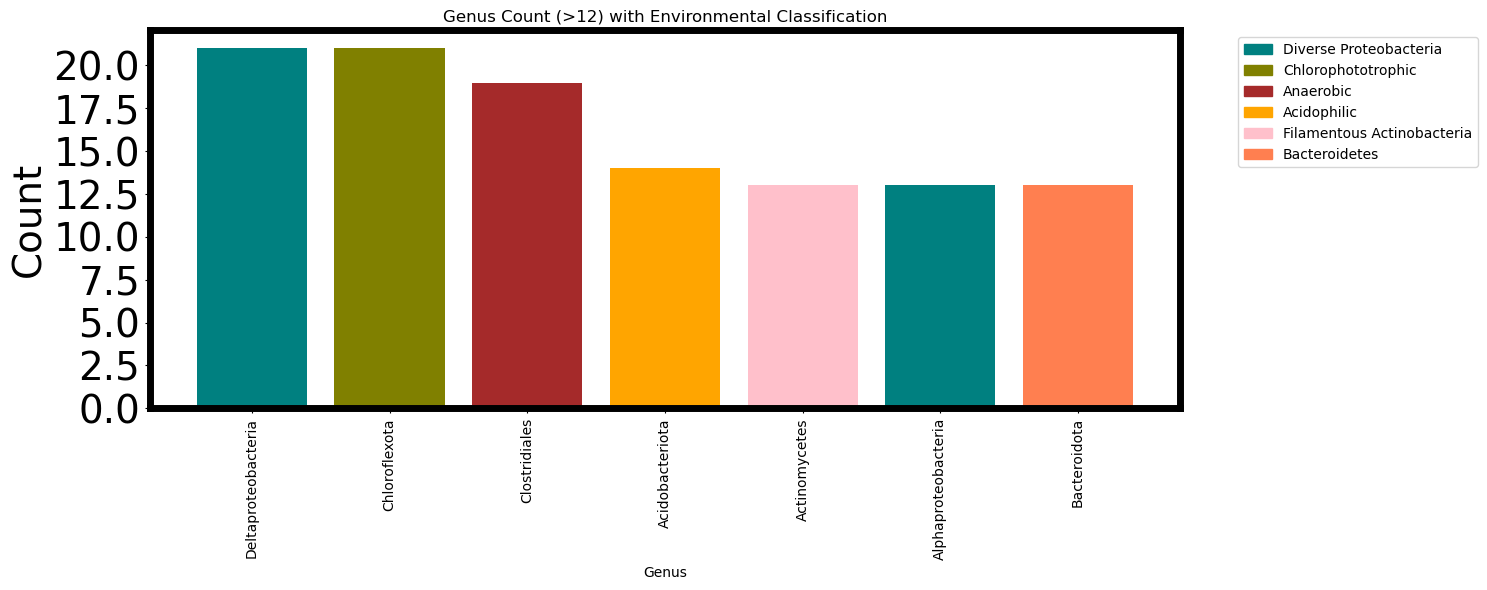

Plot saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/in_none_ex_wt_Genus_12.png
File saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/in_none_ex_wt_Classification_12.csv


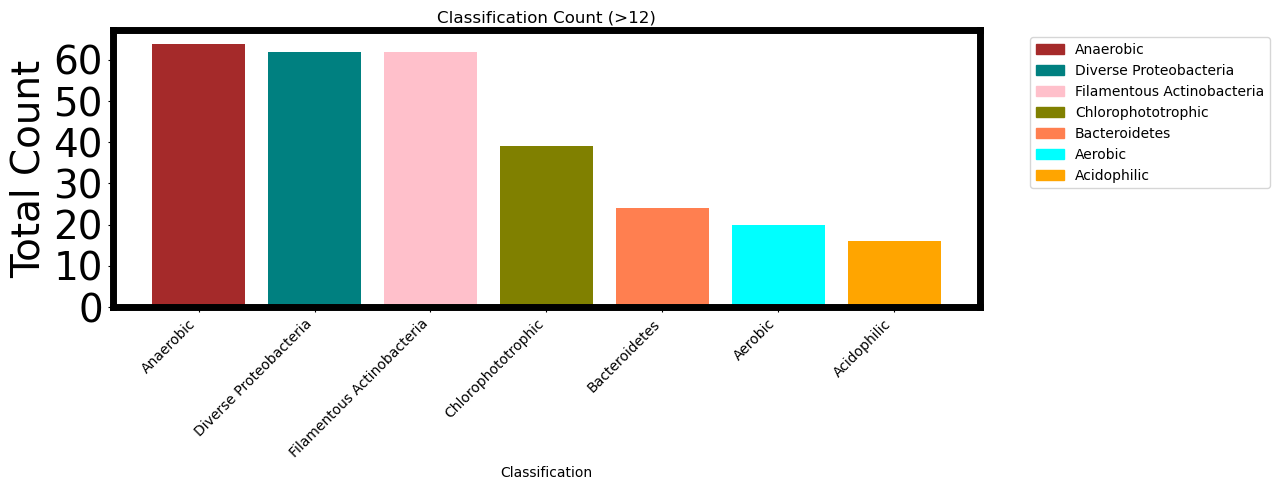

Plot saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/in_none_ex_wt_Classification_12.png


In [20]:
#24. plot the genus based on library. 
import pandas as pd
import os
import matplotlib.pyplot as plt

#####################################################################################################24
count_thr = 12
font_size = 28
frame_width = 5
input_genus = summary_in_wt_ex_mutants
input_genus = summary_in_wt_ex_none
input_genus = summary_in_none_ex_wt
#######################################################################################################

# Dictionary of genus classifications
genus_classifications = {
    "Anaerobic": [
        "Clostridiales", "Clostridiaceae", "Oscillospiraceae", "Clostridium", "Bacteroides",
        "Ruminococcus", "Peptostreptococcus", "Gottschalkia", "Ruminiclostridium", "Faecalibacterium",
        "Veillonella", "Desulfovibrio", "Desulfofustis", "Desulfuromonadales", "Desulfoglaeba", 
        "Desulfovibrionales", "Natranaerobius", "Thermoanaerobaculia"
    ],
    "Aerobic": [
        "Mycobacterium", "Pseudomonas", "Nocardia", "Rhodospirillaceae", "Sphingomonadales",
        "Sphingomonas", "Sphingopyxis", "Reyranella", "Phenylobacterium", "Glaciecola", 
        "Brucella", "Burkholderiaceae", "Rhodospirillales"
    ],
    "Mesophilic": [
        "Escherichia", "Staphylococcus", "Bacillus", "Pseudomonas"
    ],
    "Acidophilic": [
        "Acidithiobacillus", "Ferroplasma", "Acidobacteriota", "Actinacidiphila", "Acidiluteibacter",
        "Blastocatellia"
    ],
    "Chlorophototrophic": [
        "Chloroflexota", "Anaerolineae", "Anaerolineales", "Dehalococcoidia", 
        "Roseiflexus", "Roseiflexaceae", "Chloroflexia", "Chloroflexi"
    ],
    "Halophilic": [
        "Halobacterium", "Haloarcula", "Salinibacter"
    ],
    "Thermophilic": [
        "Thermus", "Geobacillus", "Thermotoga", "Sulfolobus", "Thermogemmatispora", 
        "Thermopolyspora", "Thermoleophilia", "Thermocatellispora", "Thermoanaerobaculia", 
        "Caldicellulosiruptor"
    ],
    "Filamentous Actinobacteria": [
        "Actinomycetes", "Actinobacteria", "Actinomycetota", "Acidimicrobiia", "Acidimicrobiaceae",
        "Nonomuraea", "Actinomadura", "Planotetraspora", "Streptosporangium", "Streptacidiphilus",
        "Actinoallomurus", "Actinoplanes", "Streptosporangiaceae", "Planomonospora",
        "Planobispora", "Spongiactinospora", "Thermocatellispora", "Allonocardiopsis", 
        "Bailinhaonella", "Thermopolyspora", "Marisediminicola", "Thermoleophilia", 
        "Saccharothrix", "Streptomyces", "Streptomyces coelicolor", "S. coelicolor", 
        "S_coelicolor", "Streptomyces griseus", "S. griseus", "S_griseus", 
        "Streptomyces avermitilis", "S. avermitilis", "S_avermitilis", "Streptomyces venezuelae", 
        "S. venezuelae", "S_venezuelae", "Streptomyces clavuligerus", "S. clavuligerus", 
        "S_clavuligerus", "Streptomonospora"
    ],
    "Diverse Proteobacteria": [
        "Gammaproteobacteria", "Alphaproteobacteria", "Betaproteobacteria", "Epsilonproteobacteria",
        "Deltaproteobacteria", "Myxococcales", "Rickettsiales", "Burkholderiales", 
        "Pseudomonadota", "Campylobacter", "Helicobacter", "Sulfurimonas", "Thauera",
        "Caulobacteraceae", "Reyranella"
    ],
    "Bacteroidetes": [
        "Bacteroidota", "Bacteroides", "Bacteroidetes", "Bacteroidetes/Chlorobi", "Porphyromonadaceae",
        "Sphingobacterium", "Flavobacterium", "Alistipes"
    ],
    "Acidobacteria": [
        "Acidobacteriota", "Acidiluteibacter", "Blastocatellia"
    ],
    "Unclassified": [
        "Candidatus", "Firmicutes", "marine", "uncultured", "bacterium", "bioreactor", 
        "includes:", "endosymbiont", "environmental sample", "unknown"
    ]
}

def classify_genus(genus_name):
    for category, genera in genus_classifications.items():
        if genus_name in genera:
            return category
    return "Unknown"

def analyze_genus_column(file_path):
    df = pd.read_csv(file_path)

    # Check correct column name
    if "Species Name" not in df.columns:
        raise ValueError("The input CSV must contain a column named 'Species Name'.")

    # Extract genus (first word)
    df["Genus"] = df["Species Name"].astype(str).str.strip().str.split().str[0]

    # Count unique genera
    genus_counts = df["Genus"].value_counts().reset_index()
    genus_counts.columns = ["Genus", "Count"]

    # Apply classification
    genus_counts["Classification"] = genus_counts["Genus"].apply(classify_genus)

    # Save output
    output_path = os.path.join(os.path.dirname(file_path), f"{os.path.splitext(os.path.basename(file_path))[0]}_Genus_{count_thr}.csv")
    genus_counts.to_csv(output_path, index=False)

    print(f"File saved: {output_path}")

def plot_genus_bar_chart(genus_csv_path):
    import matplotlib.patches as mpatches

    df = pd.read_csv(genus_csv_path)

    # Filter out low counts
    df = df[(df["Count"] > count_thr) & (~df["Classification"].isin(["Unknown", "Unclassified"]))]

    if df.empty:
        print(f"No genus with count > {count_thr}. Plot not generated.")
        return

    # Classification to color mapping
    classification_colors = {
        "Thermophilic": "red",
        "Mesophilic": "yellow",
        "Psychrophilic": "blue",
        "Halophilic": "purple",
        "Acidophilic": "orange",
        "Alkaliphilic": "green",
        "Anaerobic": "brown",
        "Aerobic": "cyan",
        "Filamentous Actinobacteria": "pink",
        "Diverse Proteobacteria": "teal",
        "Chlorophototrophic": "olive",
        "Acidobacteria": "lime",
        "Bacteroidetes": "coral",
        "Unclassified": "black",
        "Unknown": "gray"
    }

    # Assign colors
    colors = [classification_colors.get(c, "gray") for c in df["Classification"]]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(df["Genus"], df["Count"], color=colors)
    plt.xlabel("Genus")
    plt.ylabel("Count", fontsize=font_size)
    plt.title(f"Genus Count (>{count_thr}) with Environmental Classification")
    plt.xticks(rotation=90)
    plt.yticks(fontsize=font_size)
    for spine in plt.gca().spines.values():
        spine.set_linewidth(frame_width)
    plt.tight_layout()

    # Create legend handles only for used classes
    used_classes = df["Classification"].unique()
    legend_handles = [
        mpatches.Patch(color=classification_colors.get(cls, "gray"), label=cls)
        for cls in used_classes
    ]
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save PNG
    output_png = genus_csv_path.replace(".csv", ".png")
    plt.savefig(output_png, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved: {output_png}")

# Run genus analysis and plot
analyze_genus_column(input_genus)
output_genus_csv = os.path.join(os.path.dirname(input_genus), f"{os.path.splitext(os.path.basename(input_genus))[0]}_Genus_{count_thr}.csv")
plot_genus_bar_chart(output_genus_csv)

# Run classification-based summary and plot
def analyze_classification_column(genus_csv_path):
    df = pd.read_csv(genus_csv_path)

    # Group by classification and sum counts
    class_counts = df.groupby("Classification", as_index=False)["Count"].sum()
    class_counts = class_counts.sort_values(by="Count", ascending=False)

    # Save output
    output_path = genus_csv_path.replace("Genus", "Classification")
    class_counts.to_csv(output_path, index=False)
    print(f"File saved: {output_path}")
    return output_path

def plot_classification_bar_chart(class_csv_path):
    import matplotlib.patches as mpatches

    df = pd.read_csv(class_csv_path)
    df = df[(df["Count"] > count_thr) & (~df["Classification"].isin(["Unknown", "Unclassified"]))]

    if df.empty:
        print(f"No classification with count > {count_thr}. Plot not generated.")
        return

    classification_colors = {
        "Thermophilic": "red",
        "Mesophilic": "yellow",
        "Psychrophilic": "blue",
        "Halophilic": "purple",
        "Acidophilic": "orange",
        "Alkaliphilic": "green",
        "Anaerobic": "brown",
        "Aerobic": "cyan",
        "Filamentous Actinobacteria": "pink",
        "Diverse Proteobacteria": "teal",
        "Chlorophototrophic": "olive",
        "Acidobacteria": "lime",
        "Bacteroidetes": "coral",
        "Unclassified": "black",
        "Unknown": "gray"
    }

    colors = [classification_colors.get(c, "gray") for c in df["Classification"]]

    plt.figure(figsize=(10, 5))
    plt.bar(df["Classification"], df["Count"], color=colors)
    plt.xlabel("Classification")
    plt.ylabel("Total Count", fontsize=font_size)
    plt.title(f"Classification Count (>{count_thr})")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=font_size)
    for spine in plt.gca().spines.values():
        spine.set_linewidth(frame_width)
    plt.tight_layout()

    legend_handles = [
        mpatches.Patch(color=classification_colors.get(cls, "gray"), label=cls)
        for cls in df["Classification"].unique()
    ]
    plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

    output_png = class_csv_path.replace(".csv", ".png")
    plt.savefig(output_png, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved: {output_png}")

output_class_csv = analyze_classification_column(output_genus_csv)
plot_classification_bar_chart(output_class_csv)


In [7]:
#25 get ID list for a species. 

import pandas as pd
import os
import re

#####################################################################################################25
print(f"input is: {summary_TAX_fa}")
species_path = os.path.join(os.path.dirname(summary_TAX_fa),"species")
basename_species = os.path.join(species_path, os.path.basename(summary_TAX_fa))
print (basename_species)
Actinomycetota_ID = os.path.splitext(basename_species)[0] + "_Actinomycetota_ID.csv"
Streptomyces_ID = os.path.splitext(basename_species)[0] + "_Streptomyces_ID.csv"
firmicutes_ID = os.path.splitext(basename_species)[0] + "_firmicutes_ID.csv"
ADeltaproteobacteria_ID = os.path.splitext(basename_species)[0] + "_Deltaproteobacteria_ID.csv"
Chloroflexota_ID = os.path.splitext(basename_species)[0] + "_Chloroflexota_ID.csv"
Bacillota_ID = os.path.splitext(basename_species)[0] + "_Bacillota_ID.csv"
print(Bacillota_ID)
#######################################################################################################

pooling_dict = {
    "Anaerobic": [
        "Clostridiales", "Clostridiaceae", "Oscillospiraceae", "Clostridium", "Bacteroides",
        "Ruminococcus", "Peptostreptococcus", "Gottschalkia", "Ruminiclostridium", "Faecalibacterium",
        "Veillonella", "Desulfovibrio", "Desulfofustis", "Desulfuromonadales", "Desulfoglaeba", 
        "Desulfovibrionales", "Natranaerobius", "Thermoanaerobaculia"
    ],
    "Aerobic": [
        "Mycobacterium", "Pseudomonas", "Nocardia", "Rhodospirillaceae", "Sphingomonadales",
        "Sphingomonas", "Sphingopyxis", "Reyranella", "Phenylobacterium", "Glaciecola", 
        "Brucella", "Burkholderiaceae", "Rhodospirillales"
    ],
    "Mesophilic": [
        "Escherichia", "Staphylococcus", "Bacillus", "Pseudomonas"
    ],
    "Acidophilic": [
        "Acidithiobacillus", "Ferroplasma", "Acidobacteriota", "Actinacidiphila", "Acidiluteibacter",
        "Blastocatellia"
    ],
    "Chlorophototrophic": [
        "Chloroflexota", "Anaerolineae", "Anaerolineales", "Dehalococcoidia", 
        "Roseiflexus", "Roseiflexaceae", "Chloroflexia", "Chloroflexi"
    ],
    "Halophilic": [
        "Halobacterium", "Haloarcula", "Salinibacter"
    ],
    "Thermophilic": [
        "Thermus", "Geobacillus", "Thermotoga", "Sulfolobus", "Thermogemmatispora", 
        "Thermopolyspora", "Thermoleophilia", "Thermocatellispora", "Thermoanaerobaculia", 
        "Caldicellulosiruptor"
    ],
    "Filamentous Actinobacteria": [
        "Actinomycetes", "Actinobacteria", "Actinomycetota", "Acidimicrobiia", "Acidimicrobiaceae",
        "Nonomuraea", "Actinomadura", "Planotetraspora", "Streptosporangium", "Streptacidiphilus",
        "Actinoallomurus", "Actinoplanes", "Streptosporangiaceae", "Planomonospora",
        "Planobispora", "Spongiactinospora", "Thermocatellispora", "Allonocardiopsis", 
        "Bailinhaonella", "Thermopolyspora", "Marisediminicola", "Thermoleophilia", 
        "Saccharothrix", "Streptomyces", "Streptomyces coelicolor", "S. coelicolor", 
        "S_coelicolor", "Streptomyces griseus", "S. griseus", "S_griseus", 
        "Streptomyces avermitilis", "S. avermitilis", "S_avermitilis", "Streptomyces venezuelae", 
        "S. venezuelae", "S_venezuelae", "Streptomyces clavuligerus", "S. clavuligerus", 
        "S_clavuligerus", "Streptomonospora"
    ],
    "Diverse Proteobacteria": [
        "Gammaproteobacteria", "Alphaproteobacteria", "Betaproteobacteria", "Epsilonproteobacteria",
        "Deltaproteobacteria", "Myxococcales", "Rickettsiales", "Burkholderiales", 
        "Pseudomonadota", "Campylobacter", "Helicobacter", "Sulfurimonas", "Thauera",
        "Caulobacteraceae", "Reyranella"
    ],
    "Bacteroidetes": [
        "Bacteroidota", "Bacteroides", "Bacteroidetes", "Bacteroidetes/Chlorobi", "Porphyromonadaceae",
        "Sphingobacterium", "Flavobacterium", "Alistipes"
    ],
    "Acidobacteria": [
        "Acidobacteriota", "Acidiluteibacter", "Blastocatellia"
    ],
    "Unclassified": [
        "Candidatus", "Firmicutes", "marine", "uncultured", "bacterium", "bioreactor", 
        "includes:", "endosymbiont", "environmental sample", "unknown"
    ]
}


def extract_ids_by_taxonomy_all_groups(input_csv, pooling_dict):
    """
    For a single CSV file, extract IDs for each major taxonomy group in pooling_dict.
    Save outputs into a subfolder named 'species' under the same path as input_csv.
    """
    print(f"\n📂 Processing file: {input_csv}")
    try:
        df = pd.read_csv(input_csv, header=None, delimiter=",", dtype=str)
    except Exception as e:
        print(f"⚠️ Failed to read {input_csv}: {e}")
        return

    # Create species subfolder
    parent_folder = os.path.dirname(input_csv)
    species_folder = os.path.join(parent_folder, "species")
    os.makedirs(species_folder, exist_ok=True)

    for keyword, sub_keywords in pooling_dict.items():
        print(f"  🔍 Processing group: {keyword}")
        regex_pattern = r"\b(" + "|".join(re.escape(sub) for sub in sub_keywords) + r")\b"
        df_filtered = df[df[1].str.contains(regex_pattern, na=False, flags=re.IGNORECASE, regex=True)]

        if df_filtered.empty:
            print(f"    ⚠️ No matches for '{keyword}'")
            continue

        extracted_data = df_filtered.iloc[:, [0, 1]]
        base_name = os.path.splitext(os.path.basename(input_csv))[0]  # Just the filename part
        output_csv = os.path.join(species_folder, f"{base_name}_{keyword}_ID.csv")
        extracted_data.to_csv(output_csv, index=False, header=False)
        print(f"    ✅ Saved: {output_csv}")

    print("\n🎯 All groups processed.")

# Run it
extract_ids_by_taxonomy_all_groups(summary_TAX_fa, pooling_dict)


input is: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary.csv
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/combine_all_summary_ID_TAX_summary.csv
/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/combine_all_summary_ID_TAX_summary_Bacillota_ID.csv

📂 Processing file: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_summary.csv
  🔍 Processing group: Anaerobic
    ✅ Saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/combine_all_summary_ID_TAX_summary_Anaerobic_ID.csv
  🔍 Processing group: Aerobic
    ✅ Saved: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/combine_all_summary_ID_TAX_summary_Aerobic_ID.csv
  🔍 Processing group: Mesophilic
    ✅ Saved: /home/yuhong/Tu_paper2025/Combined_sel_pd

/tmp/ipykernel_985/1621495264.py:104: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df[1].str.contains(regex_pattern, na=False, flags=re.IGNORECASE, regex=True)]


In [8]:
#26. extract sequences from the source aligned sequnce from the ID list.
import os
import pandas as pd

#####################################################################################################26
# ID list dir is species_path
# source file is TAX_fa
#######################################################################################################

def extract_sequences_by_last_token(csv_dir, source_fasta):
    """
    For each *_ID.csv file in csv_dir, extract sequences from the source_fasta
    if the last underscore-separated token in the FASTA header matches any in the CSV file.
    
    Parameters:
    - csv_dir: directory containing *_ID.csv files
    - source_fasta: full path to aligned source FASTA file (.fa)
    """

    def get_last_token(s):
        return s.strip().split("_")[-1]

    # Read FASTA into dictionary {last_token: full sequence}
    sequences = {}
    with open(source_fasta, "r") as f:
        current_id = None
        current_seq = []
        for line in f:
            line = line.strip()
            if line.startswith(">"):
                if current_id:
                    sequences[get_last_token(current_id)] = (current_id, "".join(current_seq))
                current_id = line[1:]
                current_seq = []
            else:
                current_seq.append(line)
        if current_id:
            sequences[get_last_token(current_id)] = (current_id, "".join(current_seq))  # save last

    # Process each *_ID.csv file
    for csv_file in os.listdir(csv_dir):
        if not csv_file.endswith("_ID.csv"):
            continue

        csv_path = os.path.join(csv_dir, csv_file)
        df = pd.read_csv(csv_path, header=None, dtype=str)
        id_list = df.iloc[:, 0].dropna().str.strip().unique()
        id_tokens = set(get_last_token(i) for i in id_list)

        output_fasta = csv_path.replace(".csv", ".fasta")
        matched = 0

        with open(output_fasta, "w") as out_fasta:
            for token in id_tokens:
                if token in sequences:
                    header, seq = sequences[token]
                    out_fasta.write(f">{header}\n{seq}\n")
                    matched += 1
                else:
                    print(f"⚠️ No match found for token: {token}")

        print(f"✅ {csv_file} — {matched} sequences saved to {os.path.basename(output_fasta)}")

    print("\n🎯 All done!")

# Example call
extract_sequences_by_last_token(species_path, TAX_fa)


✅ combine_all_summary_ID_TAX_summary_Diverse Proteobacteria_ID.csv — 83 sequences saved to combine_all_summary_ID_TAX_summary_Diverse Proteobacteria_ID.fasta
✅ combine_all_summary_ID_TAX_summary_Chlorophototrophic_ID.csv — 39 sequences saved to combine_all_summary_ID_TAX_summary_Chlorophototrophic_ID.fasta
✅ combine_all_summary_ID_TAX_summary_Mesophilic_ID.csv — 2 sequences saved to combine_all_summary_ID_TAX_summary_Mesophilic_ID.fasta
✅ combine_all_summary_ID_TAX_summary_Acidophilic_ID.csv — 21 sequences saved to combine_all_summary_ID_TAX_summary_Acidophilic_ID.fasta
✅ combine_all_summary_ID_TAX_summary_Filamentous Actinobacteria_ID.csv — 167 sequences saved to combine_all_summary_ID_TAX_summary_Filamentous Actinobacteria_ID.fasta
✅ combine_all_summary_ID_TAX_summary_Thermophilic_ID.csv — 6 sequences saved to combine_all_summary_ID_TAX_summary_Thermophilic_ID.fasta
✅ combine_all_summary_ID_TAX_summary_Acidobacteria_ID.csv — 16 sequences saved to combine_all_summary_ID_TAX_summary_Ac

In [10]:
#27.extract the last string from column 0 for all *ID.csv from a direction then rewirte the original.
import os
import pandas as pd
#########################################################################################
dataset_dir = os.path.join(species_path,"datasets")
# copy *ID_csv to this folder.
#########################################################################################

def add_last_token_column(csv_dir):
    """
    Process all .csv files in a directory:
    - Extract the part after the last '_' from column 0
    - Add it as a new column 'LastToken'
    - Overwrite the original CSV
    """
    for fname in os.listdir(csv_dir):
        if fname.endswith(".csv"):
            file_path = os.path.join(csv_dir, fname)
            df = pd.read_csv(file_path, header=None)  # no header assumed

            if df.shape[1] > 0:
                df['LastToken'] = df[0].apply(lambda x: str(x).split('_')[-1])
                df.to_csv(file_path, index=False, header=False)

            print(f"Processed: {fname}")

add_last_token_column(dataset_dir)

Processed: combine_all_summary_ID_TAX_summary_Diverse Proteobacteria_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Chlorophototrophic_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Mesophilic_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Acidophilic_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Filamentous Actinobacteria_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Thermophilic_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Acidobacteria_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Unclassified_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Anaerobic_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Aerobic_ID.csv
Processed: combine_all_summary_ID_TAX_summary_Bacteroidetes_ID.csv


In [12]:
#28. extract dataset from datasetA (#19)
import os
import pandas as pd

# ###############################################################################3
print(datasetA)  # Folder with .csv files
# ################################################################################

def filter_txt_by_csv_keywords(txt_file, keyword_csv):
    """
    For each row in the .csv file, take the value in column index 3 (4th column),
    and keep lines from the txt_file that contain any of those values.
    Output is named: <csv_basename>_dataset.txt
    """
    keyword_df = pd.read_csv(keyword_csv, header=None)

    # Ensure column 3 exists ############################################need to see which column to use
    if keyword_df.shape[1] <= 2:
        print(f"Skipping {keyword_csv}: not enough columns.")
        return

    keywords = [str(k).lower() for k in keyword_df.iloc[:, 2].tolist()]
    base_name = os.path.splitext(os.path.basename(keyword_csv))[0]
    output_file = os.path.join(os.path.dirname(keyword_csv), base_name + "_dataset.txt")

    with open(txt_file) as fin, open(output_file, 'w') as fout:
        for line in fin:
            if any(kw in line.lower() for kw in keywords):
                fout.write(line)

    print(f"Written: {output_file}")


for fname in os.listdir(dataset_dir):
    if fname.endswith(".csv"):
        csv_path = os.path.join(dataset_dir, fname)
        filter_txt_by_csv_keywords(datasetA, csv_path)


/home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/combine_all_summary_ID_TAX_shortened_filtered_itol_datasetA.txt
Written: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/datasets/combine_all_summary_ID_TAX_summary_Diverse Proteobacteria_ID_dataset.txt
Written: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/datasets/combine_all_summary_ID_TAX_summary_Chlorophototrophic_ID_dataset.txt
Written: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/datasets/combine_all_summary_ID_TAX_summary_Mesophilic_ID_dataset.txt
Written: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/datasets/combine_all_summary_ID_TAX_summary_Acidophilic_ID_dataset.txt
Written: /home/yuhong/Tu_paper2025/Combined_sel_pdb/1st_212-394_RMSD/2nd_183-199_RMSD/tree/species/datasets/combine_all_summary_ID_TAX_summary_Filamentous Ac